<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/subroutine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantum Subroutines**

In [ ]:
!pip install cirq --quiet
import cirq
import sympy
from cirq.contrib.svg import SVGCircuit
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # %matplotlib inline
print(cirq.__version__)

https://pennylane.ai/qml/demos_qml.html

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_041.JPG)

https://www.nature.com/articles/npjqi201523#Sec12

https://qiskit.org/textbook/ch-appendix/linear_algebra.html 

#### **<font color="blue">Simple Addition with Qubits**

**Task 1: Addition of 1 + 0 + 0 = 1 (01 in binary): We flip q0 and q1 from 0 to 1 with Pauli-X**

**Task 2: Addition of 1 + 1 + 0 = 2 (10 in binary): We flip q0 and q1 from 0 to 1 with Pauli-X**

**Task 3: Addition of 1 + 1 + 1 = 3 (11 in binary): We flip q0, q1 and q2 from 0 to 1 with Pauli-X**

https://qiskit.org/textbook/ch-states/atoms-computation.html#adder

0+0 = 00 (in decimal, this is 0+0=0)

0+1 = 01 (in decimal, this is 0+1=1)

1+0 = 01 (in decimal, this is 1+0=1)

1+1 = 10 (in decimal, this is 1+1=2)

This is called a half adder. If our computer can implement this, and if it can chain many of them together, it can add anything.



In [ ]:
# Create Circuit object
circuit = cirq.Circuit()

# Define 2 qubits - They start with 0 (if you measure no, you'll see a 0 in both)
(q0, q1, q2, q3) = cirq.LineQubit.range(4)



## Set up calculation:

# We flip q0 from 0 to 1 with Pauli-X 
circuit.append([cirq.X(q0)]) 

# We flip q1 from 0 to 1 with Pauli-X 
#circuit.append([cirq.X(q1)]) 

# We flip q2 from 0 to 1 with Pauli-X 
#circuit.append([cirq.X(q2)])



# CNOT (Controlled Pauli X) for input q2 and target q0 (0 is same, 1 if different for target)
# since q2 is 0 and q0 is 1, result will stay 1
circuit.append([cirq.CNOT(q0, q2)])

# CNOT (Controlled Pauli X) for input q2 and target q1 (0 is same, 1 if different for target)
# since q2 is 0 and q1 is 1, result will stay 1
circuit.append([cirq.CNOT(q1, q2)])

# Toffoli (CCNOT) gate on q3 (if both inputs are equal, write 1, else 0) (perform a NOT on target qubit when both controls are in state 1)
circuit.append([cirq.CCX(q0, q1, q3)])

# Measure output quantum bits q2 and q3
circuit.append([cirq.measure(q2), cirq.measure(q3)])

# See what circuit has been produced (optional)
print(circuit)

                  ┌──┐
0: ───X───@────────@─────────
          │        │
1: ───────┼───@────@─────────
          │   │    │
2: ───────X───X────┼M────────
                   │
3: ────────────────X─────M───
                  └──┘


In [ ]:
# Step 6: Perform simulation of the circuit and read out result
sim = cirq.Simulator()
results = sim.run(circuit, repetitions=10)
print(results)

2=1111111111
3=0000000000


> Read from rightmost qubit first (q3) and then next left (q2): result is 10 (binary) = 2 in decimal

#### **<font color="blue">Superdense Coding**

###### **<font color="black">1 Qubit - Tensor Product of two Parallel Gates (Superposition in Multiple Qubits)**

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

The tensor product (or Kronecker product) of two quantum gates is the gate that is equal to the two gates in parallel.

In [ ]:
# Define operations
ops=[cirq.Y(a), # Superposition
     cirq.X(b), # Entanglement
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───Y───M───
          │
b: ───X───M───


*Two gates $Y$ and $X$ in parallel is equivalent to the gate $Y\otimes X$*

![ggg](https://upload.wikimedia.org/wikipedia/commons/d/d5/Parallel_quantum_logic_gates.png)

If we, as in the picture, combine the Pauli-Y gate with the Pauli-X gate in parallel, then this can be written as:

> $C=Y \otimes X=\left[\begin{array}{cc}0 & -i \\ i & 0\end{array}\right] \otimes\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right]=\left[\begin{array}{ll}0\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] & -i\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] \\ i\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] & 0\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right]\end{array}\right]=\left[\begin{array}{cccc}0 & 0 & 0 & -i \\ 0 & 0 & -i & 0 \\ 0 & i & 0 & 0 \\ i & 0 & 0 & 0\end{array}\right]$

Both the Pauli-X and the Pauli-Y gate act on a single qubit. The resulting gate $C$ act on two qubits.

In [ ]:
# Run Simulations & Measurements
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=10)
print('Measurement results')
print(result)

Measurement results
a,b=1111111111, 1111111111


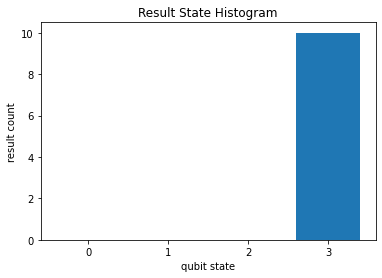

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())

In [ ]:
result.histogram(key="a,b")

Counter({3: 10})

###### **<font color="black">2 Qubits - CNOT Gate (CX) [and Controlled-U Gate]: Create Bell state (Superposition across Multiple Qubits)**

> CNOT, acting on a two-qubit term $\left|q_{1} q_{2}\right\rangle$, applies the $\mathbf{N O T}(\mathbf{X})$ gate to the second qubit only if the first qubit is in state $|1\rangle$. The first qubit controls the action on the second.

> 0 im Output wenn zwei Inputs gleich sind. 1 im Output wenn die Inputs unterschiedlich sind.

*Entanglement*

In [ ]:
cirq.unitary(cirq.CNOT)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

The [Controlled NOT gate](https://en.m.wikipedia.org/wiki/Controlled_NOT_gate) (also C-NOT or CNOT, controlled Pauli-X) is a quantum logic gate that is an essential component in the construction of a gate-based quantum computer. **It can be used to entangle and disentangle Bell states**. Any quantum circuit can be simulated to an arbitrary degree of accuracy using a combination of CNOT gates and single qubit rotations.

>$
\begin{array}{|c|c|c|c|}
\hline {\text { Before }} & {\text { Before }}& {\text { After }}& {\text { After }} \\
\hline \text { Control } & \text { Target } & \text { Control } & \text { Target } \\
\hline|0\rangle & |0\rangle & |0\rangle & |0\rangle \\
\hline|0\rangle & |1\rangle & |0\rangle & |1\rangle \\
\hline|1\rangle & |0\rangle & |1\rangle & |1\rangle \\
\hline|1\rangle & |1\rangle & |1\rangle & |0\rangle \\
\hline
\end{array}
$

A common application of the $\mathrm{C}_{\text {NOT }}$ gate is to maximally entangle two qubits into the $\left|\Phi^{+}\right\rangle$ Bell state; this forms part of the setup of the superdense coding, quantum teleportation, and entangled quantum cryptography algorithms.

CNOT or controlled Pauli-X.

* **Verschrankt zwei Qubits und invertiert das Ziel-Qubit**, wenn das Kontroll-Qubit 1 ist:

> $|00\rangle \rightarrow|00\rangle$

> $|01\rangle \rightarrow|01\rangle$

> $|10\rangle \rightarrow|11\rangle$

> $|11\rangle \rightarrow|10\rangle$

Matrix-Darstellung:

> $\left(\begin{array}{llll}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{array}\right)$

The CNOT (or controlled Pauli- $X$ ) gate can be described as the gate that maps the basis states $|a, b\rangle \mapsto|a, a \oplus b\rangle$, where $\oplus$ is XOR.

**Controlled-U Gate**

More generally if $U$ is a gate that operates on single qubits with matrix representation

>$
U=\left[\begin{array}{ll}
u_{00} & u_{01} \\
u_{10} & u_{11}
\end{array}\right]
$

then the controlled-U gate is a gate that operates on two qubits in such a way that the first qubit serves as a control. 

It maps the basis states as follows:

$|00\rangle \mapsto|00\rangle$

$|01\rangle \mapsto|01\rangle$

$|10\rangle \mapsto|1\rangle \otimes U|0\rangle=|1\rangle \otimes\left(u_{00}|0\rangle+u_{10}|1\rangle\right)$

$|11\rangle \mapsto|1\rangle \otimes U|1\rangle=|1\rangle \otimes\left(u_{01}|0\rangle+u_{11}|1\rangle\right)$

The matrix representing the controlled $U$ is

>$
\mathrm{C} U=\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}
\end{array}\right]
$

**When U is one of the Pauli operators, X,Y, Z, the respective terms "controlled-X", "controlled-Y", or "controlled-Z" are sometimes used**. 
Sometimes this is shortened to just CX, CY and CZ.

**Code example: Create Bell state**

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

In [ ]:
# Define operations
ops=[cirq.H(a), # Superposition
     cirq.CNOT(a,b), # Entanglement
     cirq.H(a),
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───@───H───M───
          │       │
b: ───────X───────M───


*More about creating Bell state from superposition & entanglement: [Demystifying Superdense Coding](https://medium.com/qiskit/demystifying-superdense-coding-41d46401910e)*

In [ ]:
# Run Simulations & Measurements
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

Measurement results
a,b=1110010101010110111100101011011111100100110101101101110000110001010000101011100100111110000001011001, 1100000001000011000100101011011000110101101001100111111001101000001100010010100010100100001010100000


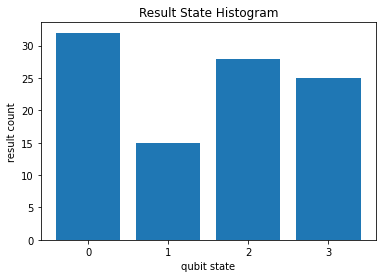

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

In [ ]:
result.histogram(key="a,b")

Counter({0: 32, 1: 15, 2: 28, 3: 25})

**Make Bell state operations reverse**

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

*Operators are unitary*

In [ ]:
# Define operations
ops=[cirq.H(a), # Superposition
     cirq.CNOT(a,b), # Entanglement
     cirq.CNOT(a,b),
     cirq.H(a),
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───@───@───H───M───
          │   │       │
b: ───────X───X───────M───


In [ ]:
# Run Simulations & Measurements
# Outcome should be same as step 1: 0, back to as if nothing happened
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

Measurement results
a,b=0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000, 0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [ ]:
result.histogram(key="a,b")

Counter({0: 100})

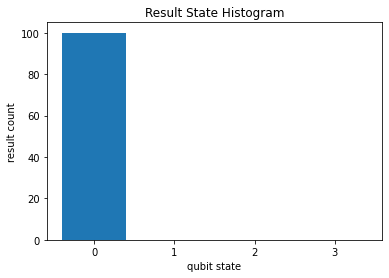

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

**Multiple Qubits: Product State vs Entangled State (Bell State)**

* As the name implies, entanglement is a property of quantum mechanical systems that only reveals itself when states begin to interact.

* When two qubits are brought together and we'd like to consider the new joint system that they form, we use a fancy new symbol: ⊗. This is called the tensor product, but really it just represents a combination of two or more quantum states.

**Product States**
* States which can be described as a tensor product of two independent superpositions are known as product states. 

A joint state of two initialized qubits can be represented as

>$|0\rangle\otimes|0\rangle$

If we apply the Hadamard gate to the first qubit, it transforms but leaves the other qubit unaffected, since the Hadamard is a single qubit gate:

>$
\mathbf{H}|0\rangle \otimes|0\rangle=\left(\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle\right) \otimes|0\rangle
$

**Exkurs**: wenn ein Gate bei einem Single Qubit mehr Probability als 0,5 hat, kann man das so schreiben (Achtung: Koeffizient ist Wurzel aus Probability),

> $\mathbf{H}|0\rangle\ = (0,9) * |0\rangle + (0,1) * |1\rangle$

* 0,71 ist für 50% Probability (man muss es squared nehmen!)

* 0,9 ist für 0,99 Probability

* 1 ist für 100% Probability für State 0, der andere Term hat dann 0 % und verschwindet. Es bleibt dann nur noch $|0\rangle$

The tensor product is distributive, which in this case means it acts much like multiplication:

>$
\mathbf{H}|0\rangle \otimes|0\rangle=\frac{1}{\sqrt{2}}|0\rangle \otimes|0\rangle+\frac{1}{\sqrt{2}}|1\rangle \otimes|0\rangle \text {. }
$

Using a series of single-qubit gates, we can transform two initialized qubits into two new arbitrary states:

>$
\begin{array}{l}
\text { Qubit 1: } \quad|0\rangle \rightarrow a_{1}|0\rangle+a_{2}|1\rangle \\
\text { Qubit 2: } \quad|0\rangle \rightarrow b_{1}|0\rangle+b_{2}|1\rangle .
\end{array}
$

The resulting 2 -qubit state is usually written as their product using a fancy new symbol:

>$|0\rangle
\otimes|0\rangle \rightarrow\left(a_{1}|0\rangle+a_{2}|1\rangle\right) \otimes\left(b_{1}|0\rangle+b_{2}|1\rangle\right)
$

Another way to express this would be:

> $a_{1} b_{1}|0\rangle \otimes|0\rangle+a_{1} b_{2}|0\rangle \otimes|1\rangle+a_{2} b_{1}|1\rangle \otimes|0\rangle+a_{2} b_{2}|1\rangle \otimes|1\rangle$

**Bell state (Entangled State)**

* To simplify notations, we sometimes omit the $\otimes$ sign and only **write $|00\rangle$ to denote that both the first qubit and the second qubit are in the $|0\rangle$ state**. 

* There are four total 2 -qubit combinations, including $|01\rangle=|0\rangle \otimes|1\rangle$, and so on.

With this simplified notation, a general 2 -qubit joint state can be written as an arbitrary linear combination of four 2 -qubit computational states:

>$
a|00\rangle+b|01\rangle+c|10\rangle+d|11\rangle
$

This is quite a bit different than the joint state found by preparing both qubits into independent single-qubit superpositions:

>$
\left(a_{1}|0\rangle+a_{2}|1\rangle\right) \otimes\left(b_{1}|0\rangle+b_{2}|1\rangle\right)=a_{1} b_{1}|00\rangle+a_{1} b_{2}|01\rangle+a_{2} b_{1}|10\rangle+
$

* simple and well-known joint state called the Bell state:

> $\frac{1}{\sqrt{2}}|00\rangle+\frac{1}{\sqrt{2}}|11\rangle$

* you can NOT write the Bell state as a product of two single-qubit states

Entangled States
* The Bell state is the prototypical example of an entangled state. 
* Two qubits which are entangled can never be separated into two independent states: their coefficients are a tangled-up mess:

> $|\psi\rangle_{\text {Bell }}=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_036.jpg)

* We can contrast this with n-qubit product states, where the state of every qubit is known and they have only 2n independent amplitudes. This is a vast difference! 

* This means that most of the n-qubit space is populated by entangled states, ones that can't be written as a simple product of its components.

* We will see in a bit that with only two parameterized gates, we could transform an initialized qubit into any possible single qubit state on the surface of the Bloch sphere:

> $\mathcal{R}_{\phi} \mathcal{R}_{\theta}|0\rangle=a_{1}|0\rangle+a_{2}|1\rangle$

**How to get to an Entanglement Circuit?**

To start, we can prepare two qubits in the $|0\rangle$ state. At this point there's no connection between them, and we can write them in the product state $|\psi\rangle=$
$|0\rangle \otimes|0\rangle$ which is the same as $|00\rangle$.

Comparing $|\psi\rangle$ to the Bell state, we see that at some point along the way, we'll need to get into a superposition. Using the set of gates we currently have at our disposal $(\mathbf{X}, \mathbf{Z}, \mathbf{H})$, there doesn't appear to be a single gate that we can apply to take us from $|\psi\rangle$ to $\left|\psi_{\text {Bell }}\right\rangle .$ Naively, it seems that we have two tasks ahead of
us:

1. Getting $|\psi\rangle$ into a superposition.

2. Adjusting the individual kets so that we're in the Bell state.

At the moment we have the Hadamard, which can move one of our qubits into superposition. For argument's sake, let's apply it to the first qubit:
$$
\begin{aligned}
\mathbf{H}_{1}|\psi\rangle &=(\mathbf{H}|0\rangle) \otimes|0\rangle \\
&=\frac{|0\rangle+|1\rangle}{\sqrt{2}} \otimes|0\rangle \\
&=\frac{|00\rangle+|10\rangle}{\sqrt{2}} .
\end{aligned}
$$

Now we need to find gates that allow us to coordinate action on two qubits.

While single qubit gates like $\mathbf{X}$ and $\mathbf{H}$ can't get us all the way to the Bell state, we'd still like to keep our gate set as simple as possible. In this spirit, let's stick with the Hadamard gate to perform our superposition, and look for a multiqubit gate $\mathrm{M}$ that can get us the rest of the way:

> $
\frac{|00\rangle+|10\rangle}{\sqrt{2}} \stackrel{\mathrm{M}}{\longrightarrow} \frac{|00\rangle+|11\rangle}{\sqrt{2}}
$

**Die erste Spalte mit 0 und 1 (links jeweils) zeigt, dass dieses Qubit in einer Superposition ist mit 50% Probability von 0 und 1, während das zweite Qubit (jeweils rechts) 0 und 0 ist, weil es sich nich im initialen Zustand befindet, der immer 100% 0 ist!**

Following behaviors would make for a suitable multi-qubit gate M:

* Flip qubit 2 whenever qubit 1 and qubit 2 are opposite

* Flip qubit 2 if qubit 1 is in state ∣1⟩

* we need to keep the core principle of quantum mechanics — reversibility!

Consider the action of $\mathbf{M}$ on the two-qubit basis states: if a $|11\rangle$ term appears in the quantum state after we apply $\mathrm{M}$, we can't tell if it's because we started with a $|11\rangle$ term, or if it's because we started with a $|10\rangle$ term.

The preferred entangling gate, called CNOT (controlled NOT), gets us into the Bell state while respecting the reversibility condition:
$$
\begin{array}{l}
|00\rangle \stackrel{\text { CNOT }}{\longrightarrow}|00\rangle \\
|01\rangle \stackrel{\text { CNOT }}{\longrightarrow}|01\rangle \\
|10\rangle \stackrel{\text { CNOT }}{\longrightarrow}|11\rangle \\
|11\rangle \stackrel{\text { CNOT }}{\longrightarrow}|10\rangle .
\end{array}
$$

> CNOT, acting on a two-qubit term $\left|q_{1} q_{2}\right\rangle$, applies the $\mathbf{N O T}(\mathbf{X})$ gate to the second qubit only if the first qubit is in state $|1\rangle$. The first qubit controls the action on the second.

This enables us to prepare the entangled Bell state and is a subroutine

> $\frac{|10\rangle+|00\rangle}{\sqrt{2}} \stackrel{\text { CNOT }}{\longrightarrow} \frac{|11\rangle+|00\rangle}{\sqrt{2}}$

**For Quantum Cryptography**

* But Alice and Bob aren't stuck with the computational basis: **the Bell state is entangled no matter what basis we use to analyze it**. This is particularly easy to see by switching to the Hadamard basis. 

* As we showed before, the Bell state has the same form in the computational basis as it does in the Hadamard basis:

> $\left|\psi_{\text {Bell }}\right\rangle=\frac{|00\rangle+|11\rangle}{\sqrt{2}}=\frac{|--\rangle+|++\rangle}{\sqrt{2}}$

* So, Alice and Bob are free to use either basis to coordinate their bits.

*If Alice measures her qubit using the Hadamard basis, what are the possibilities for Bob's measurement in the computational basis?*

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_037.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_038.jpg)

**CNOT Gate and Entanglement**

Quantum states $|\psi\rangle$ aren't always one of the computational basis states. 

In general, they can also be (ignoring normalization factors)

>$
|+\rangle=|0\rangle+|1\rangle
$

or

>$
|-\rangle=|0\rangle-|1\rangle \text {. }
$

*What does the CNOT gate do with these input states?*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_039.jpg)

###### **<font color="black">2 Qubits - H, CNOT & X-Gate: Superdense Coding for Quantum Communication**

Superdense Coding is a method to transmit two classical bits of information by sending only one qubit of information. This is accomplished by pre-sharing an entangled state between the sender and the receiver. This entangled state allows the receiver of the one qubit of information to decode the two classical bits that were originally encoded by the sender.

*Complete example from Cirq*

In [ ]:
def make_superdense_circuit():
    circuit = cirq.Circuit()
    q0, q1, q2, q3, q4 = cirq.LineQubit.range(5)

    # Randomly sets q0 and q1 to either 0 or 1
    circuit.append([cirq.H(q0), cirq.H(q1)])
    circuit.append(cirq.measure(q0, q1, key="input "))

    # Creates Bell State to be shared on q2 and q4
    circuit.append([cirq.H(q2), cirq.CNOT(q2, q4)])
    # Step 1 of encoding (controlled NOT gate on q1 / q2)
    circuit.append(cirq.CNOT(q1, q2))
    # Step 2 of encoding (controlled Z gate on q0 / q2)
    circuit.append(cirq.CZ(q0, q2))
    # Sends encoded information to receiver
    circuit.append(cirq.SWAP(q2, q3))
    # Step 1 of decoding (controlled NOT gate on q3 and q4)
    circuit.append(cirq.CNOT(q3, q4))
    # Step 2 of decoding (Hadamard gate on q3)
    circuit.append(cirq.H(q3))
    # Measurement by receiver to decode bits
    circuit.append(cirq.measure(q3, q4, key="output"))

    return circuit


def main():
    circuit = make_superdense_circuit()
    print("Circuit:")
    print(circuit)

    sim = cirq.Simulator()
    results = sim.run(circuit, repetitions=20)
    print("\nResults:")
    print(results)


if __name__ == '__main__':
    main()

NameError: ignored

*Step by Step Walkthrough*

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

https://medium.com/qiskit/demystifying-superdense-coding-41d46401910e

*Now adding Pauli X gate to alter outcome*

In [ ]:
# Define operations
ops=[cirq.H(a), # Superposition
     cirq.CNOT(a,b), # Entanglement
     cirq.X(a), # Pauli X gate -> changes outcome from 00 to 01
     cirq.CNOT(a,b),
     cirq.H(a),
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

In [ ]:
result.histogram(key="a,b")

#### **<font color="red">Basic QFT-based Subroutines (Deutsch, Bernstein, Simon)**

###### **<font color="blue">Deutsch–Jozsa</font>**

https://jonathan-hui.medium.com/qc-quantum-algorithm-with-an-example-cf22c0b1ec31

Allgemein Oracel: https://towardsdatascience.com/the-quantum-oracle-demystified-65e8ffebd5d5

> Constant or balanced?

* nutzt Quantum Fourier Transform

There are four different possible functions:
* Function f_0 always returns 0.
* Function f_1 returns 0 if the input is 0 and it returns 1 if the input is 1.
* Function f_2 returns 1 if the input is 0 and it returns 0 if the input is 1.
* Function f_3 always returns 1.

Task: 
* Send a number of several numbers to determine, if the function is a constant or a balanced?
* f_0 und f_3 constant, f_1 und f_2 balanced
* classical needs at least 2 numbers (0,1), quantum needs just 1 number to solve this

https://towardsdatascience.com/how-to-solve-a-problem-with-quantum-computing-4b04f3f882d9

https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html

https://medium.com/quantum-untangled/quantum-untangled-quantum-computing-deutsch-jozsa-algorithm-guide-untangled-27adf4205913

https://medium.com/quantum-untangled/the-deutsch-jozsa-algorithm-math-circuits-and-code-quantum-algorithms-untangled-f3b28be4cfd3

https://en.m.wikipedia.org/wiki/Deutsch–Jozsa_algorithm

###### **<font color="blue">Bernstein–Vazirani algorithm</font>**

> What is a string?

https://en.m.wikipedia.org/wiki/Bernstein–Vazirani_algorithm

###### **<font color="blue">Simon's problem</font>**

https://jonathan-hui.medium.com/qc-simons-algorithm-be570a40f6de

> 1-1 or 2-1 ?

https://en.m.wikipedia.org/wiki/Simon%27s_problem

###### **<font color="blue">Boson sampling problem ('Aaronson–Arkiphov Scheme')</font>**

https://www.nature.com/articles/d41586-020-03434-7

The Hefei team, led by Pan and Chao-Yang Lu, chose a different problem for its demonstration, called boson sampling. It was devised in 2011 by two computer scientists, Scott Aaronson and Alex Arkhipov4, then at the Massachusetts Institute of Technology in Cambridge. It entails calculating the probability distribution of many bosons — a category of fundamental particle that includes photons — whose quantum waves interfere with one another in a way that essentially randomizes the position of the particles. The probability of detecting a boson at a given position can be calculated from an equation in many unknowns.

###### **<font color="blue">Quantum Minimization Algorithm (QMA)**

* Quantum algorithm for solving discrete functions minimization problems was introduced in. It is based on Grover’s search and can be represented in terms of quantum iterations circuits.

* Such algorithm allows us to find global optimum as it is always searching through all possible inputs states

* Christoph, D. and Hoyer, P. "A quantum algorithm for finding the minimum", arXiv:quant-ph/9607014 (1-2, 1996) https://arxiv.org/abs/quant-ph/9607014

* https://arxiv.org/pdf/1906.10175.pdf

#### <font color="blue">**Quantum Fourier Transform**

###### <font color="blue">**Overview**

> **Quantum Fourier Transform is the change from one basis (computational) to another (Fourier basis) - [Quantum Fourier Transform is the inverse Discrete Fourier Transform]**

https://jonathan-hui.medium.com/qc-quantum-fourier-transform-45436f90a43

https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html

https://prod-edxapp.edx-cdn.org/assets/courseware/v1/8f101da9d14cfeec83df9e42a70562bf/c4x/BerkeleyX/CS-191x/asset/chap5.pdf

* Blog Post: https://jonathan-hui.medium.com/qc-quantum-fourier-transform-45436f90a43

* Qiskit: https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html

* Cirq: https://quantumai.google/cirq/tutorials/educators/textbook_algorithms

* Youtube: https://youtu.be/rRblvBZkz7A

* IBM Youtube: https://youtu.be/mAHC1dWKNYE

* Classical Discrete Fourier Transform : https://en.m.wikipedia.org/wiki/Discrete_Fourier_transform

* https://physics.stackexchange.com/questions/219581/how-quantum-fourier-transform-equal-to-hadamard-transform-on-4-by-4-matrix

* https://physics.stackexchange.com/questions/56510/how-to-write-the-matrices-for-hadamard-gates-acting-on-differen-qubits?rq=1

* the [quantum Fourier transform](https://en.m.wikipedia.org/wiki/Quantum_Fourier_transform) (for short: QFT) is a linear transformation on quantum bits, and is the quantum analogue of the inverse discrete Fourier transform.

> The quantum Fourier transform is the classical discrete Fourier transform applied to the vector of amplitudes of a quantum state

* The quantum Fourier transform is a part of many quantum algorithms, notably Shor's algorithm for factoring and computing the discrete logarithm, the quantum phase estimation algorithm for estimating the eigenvalues of a unitary operator, and algorithms for the hidden subgroup problem. 

* The quantum Fourier transform was invented by Don Coppersmith.

* The quantum Fourier transform can be performed efficiently on a quantum computer, with a particular decomposition into a product of simpler unitary matrices. 

* However, the quantum Fourier transform acts on a quantum state, whereas the classical Fourier transform acts on a vector, so not every task that uses the classical Fourier transform can take advantage of this exponential speedup.

**Prerequisite (Update)**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_046.png)

**Formula for Quantum Fourier Transform:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_047.png)

So the QFT can be implemented with a series of the controlled-R gate as below:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_041.JPG)

A controlled-R quantum gate applies a relative phase change to |1>. The matrix form of this operator is:

> $\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

Please note that $e^{2 \pi i}$ = 1

y ist fur die computational states, und n=4 zB ist dann 100 der computation state in binary form

y = 0 oder 1. bei 0 verschwindet der ganze term

**Quantum Fourier Transform: Compactify for Circuit Representation**

https://www.youtube.com/watch?v=mAHC1dWKNYE

**Notationshinweise:**

4 ist: 100, 3 ist 11 etc.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_048.png)

**Compactify** writing y (note on top how N in the denominator cancels out with new way of writing y)

Problem: this notation doesn't say much on how to build the quantum circuit:

> $\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{2 \pi i x y}{N}}|y\rangle$


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_047.png)

We need a bit of manipulation y:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_054.png)

https://www.youtube.com/watch?v=pq2jkfJlLmY&t=1784s

So, aus 

<font color="red"> $|\tilde{x}\rangle = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{2 \pi i x y}{N}}|y\rangle$ 

wird dann: 

<font color="blue"> $|\tilde{x}\rangle = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{2 \pi i \sum_{k=1}^{n} y^{k}}{2^k}}|y_1,y_2,..y_n\rangle$ 

bzw.:

<font color="blue"> $=\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \prod_{k=1}^{n} e^{\frac{2 \pi i x y k}{2^k}}|y_1,y_2,..y_n\rangle$ 


Doing this for $y_1$ and $y_2$ etc, here you can build a circuit from (and without the fraction it looks like a Hadamard transform):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_055.png)

Now you can see it boils down to the different phases when you transform from the computational basis to the Fourier basis: (the question is only how do you apply those phases in the circuit?)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_056.png)

Here with a concrete example:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_057.png)

* $e^{\frac{2*\pi*i*5}{2}}$ ist -1 =(e^((2*pi*i*5)/2))

* (e^((2*pi*i*5)/4)) = i

* =(e^((2*pi*i*5)/8)) = -0,707106781 - 0,707106781 i

> =(e^((2*pi*i*5)/2)) gibt hierbei den Azimut an (Horizontale Phase), und (1/√ 8) die Höhe (fur Probability) ???

Going back to the 1 Qubit case with the formula above:

* =(e^((2*pi*i*1)/2)) = -1

* =(e^((2*pi*i*2)/2)) = 1

Siehe hier das Ergebnis (mit der unmodifizierten, alten Formel):

![ddd](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_045.png)

**Observations before creating the QFT circuit**

First see the notation whenever there is a 1 with a phase. Please note the $2^{n-1 etc.}$ used before for each one:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_062.jpg)

*Second observation: under (2) you can see the phase state of |1111>, which you can rewrite with the product of $e^{2 \pi i[...]}$*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_063.jpg)

**So what do you need to construct a QFT circuit?**

*First a Hamadard, which you can write in the notation below, making Hadamard looking similar to QFT: (please note that one normalization is missing at the last term)*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_061.jpg)

*UROT is applying a phase (a unitary rotation)*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_064.jpg)

**Creating the QFT circuit**

*This is what you need only to create x1:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_065.jpg)

*And this series of gates gives you exactly the terms that you get here (see black arrow). The expression $\frac{x}{2^n}$ (=$\theta$ as we will see later in quantum phase estimation). All of the rotations are applying different phases on to the first qubit.*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_066.jpg)

**Komplettes Circuit**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_067.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_068.png)

###### **Quantum Fourier Transform with 1 Qubit**

**QFT**

> <font color="blue">$e^{2\pi i}$ = 1

> In QFT we change the phase <font color="blue">$\theta$ in $e^{2\pi i \theta}$</font> (=Eigenvalue of Oracle function $U$ associated with an eigenvector |u⟩)

> Phase <font color="blue">$\theta$ is $\frac{x_n}{2^{k}}$ with $x_n$ 0 or 1</font> state and $k$ number of Qubits.

A controlled-R quantum gate applies a relative phase change to |1>. 

> The matrix form of this operator is: <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

**For n = 1 Qubit:**

> <font color="blue">$\tilde{x_1}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^{n_{x_1}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}\right)}|1\rangle\right)$ 

* <font color="blue">Für x = 0 $\Rightarrow$ $\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}\right)}|1\rangle\right)$  = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}\right)}$ = $\mathrm{e}^{2 \pi \mathrm{i} 0}$  = $\mathrm{e}^{0}$ = 1 (no rotation away from original H superposition)

* <font color="blue">Für x = 1 $\Rightarrow$ $\tilde{x_1}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}\right)}$ = $\mathrm{e}^{\pi \mathrm{i}}$ = Z-Rotation aus -1

**1 Qubit QFT that does this? - Hadamard gate:**

**One qubit QFT matrix**: $\frac{1}{\sqrt{2}}\left(\begin{array}{ll}1 & 1 \\ 1 & \mathrm{e}^{\pi i}\end{array}\right)$, where $\mathrm{e}^{\pi \mathrm{i}}$ = -1. So it is: <font color="blue"> QFT für x=1 = $\frac{1}{\sqrt{2}}\left(\begin{array}{ll}1 & 1 \\ 1 & -1\end{array}\right)$

**Compare with Hadamard transform matrix:** 

In quantum computing, the Hadamard gate is a one-qubit rotation, mapping the qubitbasis states $|0\rangle$ and $|1\rangle$ to two **superposition** states with **equal weight of the computational basis** states $|0\rangle$ and $|1\rangle$. Usually the phases are chosen so that

>$
H=\frac{|0\rangle+|1\rangle}{\sqrt{2}}\langle 0|+\frac{|0\rangle-|1\rangle}{\sqrt{2}}\langle 1|
$

in Dirac notation. This corresponds to the transformation matrix

> <font color="blue">$
H_{1}=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right)
$

in the $|0\rangle,|1\rangle$ basis, also known as the computational basis. The states $\frac{|0\rangle+|1\rangle}{\sqrt{2}}$ and $\frac{|0\rangle-|1\rangle}{\sqrt{2}}$ are known as $|+\rangle$ and $|-\rangle$ respectively, and together constitute the polar basis in quantum computing.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_049.png)

Follow and try movement here for 0: H Gate. For 1: X gate followed bz H gate:

* https://javafxpert.github.io/grok-bloch/

* https://www.st-andrews.ac.uk/physics/quvis/simulations_html5/sims/blochsphere/blochsphere.html

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_073.jpg)

https://demonstrations.wolfram.com/QuantumFourierTransformCircuit/

Reminder: QFT Formel:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_047.png)

**Why Hadamard transform is exactly a 1 qubit Quantum Fourier Transform:** (see result of + for 0 state and - for 1 state)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_045.png)

Siehe oben unter 'Mathermatik": Matrix-Vector-Multiplication (Single Qubit)

> <font color="blue">$H |0\rangle$</font> $ = \frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right)\left[\begin{array}{l}1 \\ 0\end{array}\right] =\frac{1}{\sqrt{2}}\left[\begin{array}{c}1 \\ 1\end{array}\right]$ <font color="blue">$ \,\,= |+\rangle$ = $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$

> <font color="blue">$H |1\rangle$</font>$ = \frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right)\left[\begin{array}{l}0 \\ 1\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{c}1 \\ -1\end{array}\right]$ <font color="blue">$ = |-\rangle$ = $\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$

$|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ weil <font color="gray">wegen $|0\rangle=\left[\begin{array}{l}1 \\ 0\end{array}\right]$ und $|1\rangle=\left[\begin{array}{l}0 \\ 1\end{array}\right]$ daher:</font> $\frac{1}{\sqrt{2}}\left[\begin{array}{ll}1 + 0 \\ 0 + 1\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{c}1 \\ 1\end{array}\right]$

$|-\rangle=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$ weil: $\frac{1}{\sqrt{2}}\left[\begin{array}{ll}1 - 0 \\ 0 - 1\end{array}\right]=\frac{1}{\sqrt{2}}\left[\begin{array}{c}1 \\ -1\end{array}\right]$

2 im denominator verschwindet hier. 2^n für n=1 qubit. mit 2 oben und unten verschwinden beide.

###### **Quantum Fourier Transform with 2 Qubits**

**QFT**

> <font color="blue">$e^{2\pi i}$ = 1

> In QFT we change the phase <font color="blue">$\theta$ in $e^{2\pi i \theta}$</font> (=Eigenvalue of Oracle function $U$ associated with an eigenvector |u⟩)

> Phase <font color="blue">$\theta$ is $\frac{x_n}{2^{k}}$ with $x_n$ 0 or 1</font> state and $k$ number of Qubits.

A controlled-R quantum gate applies a relative phase change to |1>. 

> The matrix form of this operator is: <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

**For n = 2 Qubits. Results for: $x_1$ = 0 oder 1, $x_2$ = 0 oder 1**

> <font color="blue">$\tilde{x_1}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^{n_{x_1}}}+\frac{x_2}{2^{n_{x_2}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}+\frac{x_2}{2^2}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2}+\frac{x_2}{4}\right)}|1\rangle\right)$

* Falls nur $\tilde{x_1}$ aktiviert, dann ist es eine Z-Rotation im Wert von $\pi$ = -1

* Falls nur $\tilde{x_2}$ aktiviert, dann ist es eine S-Rotation im Wert von $\frac{\pi}{2}$ = i

* Falls beide $\tilde{x_1}$ und $\tilde{x_2}$ aktiviert, dann ist es eine Rotation $\pi$ + $\frac{\pi}{2}$, also -i.

> <font color="blue">$\tilde{x_2}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^{n_{x_1}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^1}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_2}|1\rangle\right)$

* Falls aktiviert, dann ist $\tilde{x_2}$ immer eine Z-Rotation im Wert von $\pi$.


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_074.jpg)

*Results for 0: $x_1$ = 0, $x_2$ = 0*

* <font color="blue">$\tilde{x_1}$ =</font> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2}+\frac{x_2}{4}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{0}{4}\right)}|1\rangle\right)$  = $\mathrm{e}^{2 \pi \mathrm{i} 0}$ = $\mathrm{e}^{0}$ = 1 (no rotation away from original H superposition)

* <font color="blue">$\tilde{x_2}$ = </font>$\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_2}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}0}|1\rangle\right)$ = $\mathrm{e}^{0}$ = 1 (no rotation away from original H superposition)

*Results for 1: $x_1$ = 0, $x_2$ = 1*

* <font color="blue">$\tilde{x_1}$ =</font> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2}+\frac{x_2}{4}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{1}{4}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{4}\right)}$  = $\mathrm{e}^{\frac{\pi }{2}\mathrm{i}}$ Rotation = i

* <font color="blue">$\tilde{x_2}$ = </font>$\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_2}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}1}|1\rangle\right)$ = $\mathrm{e}^{\pi \mathrm{i}}$ Rotation = -1

*Results for 2: $x_1$ = 1, $x_2$ = 0*

* <font color="blue">$\tilde{x_1}$ =</font> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2}+\frac{x_2}{4}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{0}{4}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}\right)}$  = $\mathrm{e}^{\pi \mathrm{i}}$ Rotation = -1

* <font color="blue">$\tilde{x_2}$ = </font>$\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_2}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}1}|1\rangle\right)$ = $\mathrm{e}^{\pi \mathrm{i}}$ Rotation = -1

*Results for 3: $x_1$ = 1, $x_2$ = 1*

* <font color="blue">$\tilde{x_1}$ =</font> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2}+\frac{x_2}{4}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{1}{4}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{2}{4}+\frac{1}{4}\right)}$  = $\mathrm{e}^{1,5 \pi \mathrm{i}}$ Rotation = -i

* <font color="blue">$\tilde{x_2}$ = </font>$\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_2}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}1}|1\rangle\right)$ = $\mathrm{e}^{\pi \mathrm{i}}$ Rotation = -1

In [ ]:
def make_qft(qubits):

    # Generate list of qubits
    qreg = list(qubits)
    
    # Make sure list is longer than 0 qubits:
    while len(qreg) > 0:
    
    # Remove first qubit from list and return its value (set as head-qubit):
        q_head = qreg.pop(0)
    
    # Apply Hadamard superposition to this head-qubit
        yield cirq.H(q_head)

    # Enumerate through list with i (index position) and corresponding qubit value (0 or 1)
        for i, qubit in enumerate(qreg):

    # Apply Controlled-Z * Theta-Phase-Shift on target ('q-head') if control-qubit ('qubit') is in state 1
            yield (cirq.CZ ** (1 / 2 ** (i + 1)))(qubit, q_head)

    # Iterating through until "while len(qreg) = 0", then processes stops

"""Visually check the QFT circuit."""
qubits = cirq.LineQubit.range(2)
qft = cirq.Circuit(make_qft(qubits))
print(qft)

0: ───H───@───────────
          │
1: ───────@^0.5───H───


###### **<font color="black">Quantum Fourier Transform with 3 Qubits**

**QFT**

> <font color="blue">$e^{2\pi i}$ = 1

> In QFT we change the phase <font color="blue">$\theta$ in $e^{2\pi i \theta}$</font> (=Eigenvalue of Oracle function $U$ associated with an eigenvector |u⟩)

> Phase <font color="blue">$\theta$ is $\frac{x_n}{2^{k}}$ with $x_n$ 0 or 1</font> state and $k$ number of Qubits.

A controlled-R quantum gate applies a relative phase change to |1>. 

> The matrix form of this operator is: <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

**For n = 3 Qubits. Results for: $x_1 = 1$, $x_2 = 1$, $x_3 = 1$**

> <font color="blue">$\tilde{x_1}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^{n_{x_1}}}+\frac{x_{2}}{2^{n_{x_2}}}+\frac{x_{3}}{2^{n_{x_3}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2^1}+\frac{x_{2}}{2^2}+\frac{x_{3}}{2^3}\right)}|1\rangle\right)$  = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$

* Falls nur $\tilde{x_1}$ aktiviert, dann ist es eine Z-Rotation im Wert von $\pi$ = -1

* Falls nur $\tilde{x_2}$ aktiviert, dann ist es eine S-Rotation im Wert von $\frac{\pi}{2}$ = i

* Falls nur $\tilde{x_3}$ aktiviert, dann ist es eine T-Rotation im Wert von $\frac{\pi}{4}$ = zwischen 1 und i

> <font color="blue">$\tilde{x_2}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^{n_{x_1}}}+\frac{x_3}{2^{n_{x_2}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2^1}+\frac{x_3}{2^2}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_2}{2}+\frac{x_3}{4}\right)}|1\rangle\right)$

* Falls nur $\tilde{x_2}$ aktiviert, dann ist es eine Z-Rotation im Wert von $\pi$ = -1

* Falls nur $\tilde{x_3}$ aktiviert, dann ist es eine S-Rotation im Wert von $\frac{\pi}{2}$ = i

* Falls beide $\tilde{x_2}$ und $\tilde{x_3}$ aktiviert, dann ist es eine Rotation $\pi$ + $\frac{\pi}{2}$ = -i

> <font color="blue">$\tilde{x_3}$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_3}{2^{n_{x_1}}}\right)}|1\rangle\right)$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_3}{2^1}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i}x_3}|1\rangle\right)$

* Falls aktiviert, dann ist $\tilde{x_3}$ immer eine Z-Rotation im Wert von $\pi$.


Use these to check calculations:

https://javafxpert.github.io/grok-bloch/

https://www.st-andrews.ac.uk/physics/quvis/simulations_html5/sims/blochsphere/blochsphere.html

*Formel für Quantum Fourier Transform:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_047.png)

*Visualisierung eines QFT in 3 Qubits im Computational State |000>:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_050.png)

*QFT mit 3 Qubits in einem Circuit mit S- und T-Gates:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_076.jpg)

> **Wenn man im Hadamard + Status beginnt, und wendet dann ein S -Gate an, entspricht das einer Rotation 𝜋/2. Das entspricht 𝜇 und ist i. T ist entsprechend eine Rotation 𝜋/4.**

*Berechnung eines QFT in 3 Qubits im Computational State |011>:*

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_114.jpg)


Ein Z-Gate ist dann in x1, weil $\pi$\2

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_072.png)


https://www.cl.cam.ac.uk/teaching/1920/QuantComp/Quantum_Computing_Lecture_9.pdf

**Berechnung eines QFT in 3 Qubits im Computational State |001>:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_075.jpg)

In die Formel oben eingegeben für ein 3 Qubit mit $x_1=0, x_2=0$ und $x_3=1$ ergibt sich folgendes in umgekehrter Reihenfolge (deswegen muss das Swap-Gate machträglich angewandt werden):

* Qubit $x_1$ (=ohne Swap-Gate wie oben $x_3$): $e^{\frac{2 * \pi * i * 1}{2^{1}}}=-1$ (Z-Gate, weil negativ Hadamard)

* Qubit $x_2$: $e^{\frac{2 * \pi * i * 1}{2^{2}}}=e^{\frac{2 * \pi * i * 1}{4}}=\mathrm{i}$ (=S-Gate)

* Qubit $x_3$ (=$x_1$ im circuit oben): $e^{\frac{2 * \pi * i * 1}{2^{3}}}=e^{\frac{2 * \pi * i * 1}{8}}=e^{\frac{\pi i}{4}}$ (=T-Gate transform)

Controlled U-ROT Gate: immer da, wo control qubit eine 1 ist, wird die entsprechende Rotation übernommen, bei 0 hingegen passiert nix.

Das stimmt überein mit der folgenden geometrischen Darstellung (*3 Qubit Quantum Fourier transformation with 001 in computational state: first state is 180 degree rotated, secind by 90 degree, third by 45 degree from Hadamard + Superposition state - Rotationen werden durch UROT gates bestimmt, und aktiviert überall do, wo control =1 ist*):


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_051.png)

Mit der neuen Formel von unten $e^{\frac{2 \pi i x}{2^n}}$ angewandt für obiges Beispiel: 001 is 1 = x in decimal, und 3 Qubits n= 1,2 und 3:

* Qubit 0: $e^{\frac{2*\pi* i*1}{2^1}}$ = -1 (korrekt siehe oben)

* Qubit 1: $e^{\frac{2*\pi* i*1}{2^2}}$ = $e^{\frac{2*\pi* i*1}{4}}$ = i (korrekt siehe oben)

* Qubit 2: $e^{\frac{2*\pi* i*1}{2^3}}$ = $e^{\frac{2*\pi* i*1}{8}}$= 

  * Müsste sein laut Bloch sphere: $e^{i * {\pi / 4}}$ bzw. $e^{i* (0,25 *\pi)}$

  * Laut Berechnung mit Formel unten: $e^{\frac{2 \pi i 1}{8}}$ = $e^{\frac{\pi i}{4}}$ = $e^{(0,25*\pi) * i}$ = korrekt!!

  * check geometrically [here](https://javafxpert.github.io/grok-bloch/) und [here](https://www.st-andrews.ac.uk/physics/quvis/simulations_html5/sims/blochsphere/blochsphere.html)

  * Das ist übrigens das T gate (halbes s gate, was ein halbes z gate ist). siehe unten beispiel bei phase estimation.

**Unten: 5 = 101 in der Fourier Basis**

https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html#creating_the_circuit

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_116.png)

* The number we want to store dictates the angle at which each qubit is rotated around the Z-axis. 

* In the state $|\tilde{0}\rangle$, all qubits are in the state $|+\rangle$. 

* In the example above, to encode the state $|\tilde{5}\rangle$ (=101) on n=3 qubits, we rotated the leftmost qubit by $\frac{5}{2^{n}}=\frac{5}{8}$ full turns $\left(\frac{5}{8} \times 2 \pi\right.$ radians). 

* The next qubit is turned double this $\left(\frac{10}{8} \times 2 \pi\right.$ radians, or $\frac{10}{8}$ full turns), this angle is then doubled for the qubit after, and so on.

* **Note the frequency with which each qubit changes. The leftmost qubit (qubit 0 ) in this case has the lowest frequency, and the rightmost the highest.**

* In the Fourier basis the topmost qubit completes one full rotation when counting between 0 and $2^{t}$ .

* To count to a number, $x$ between 0 and $2^{t}$ (t = qubits), we rotate this qubit by $\frac{x}{2^{t}}$ around the z-axis. 

* For the next qubit we rotate by $\frac{2 x}{2^{t}}$, then $\frac{4 x}{2^{t}}$ for the third qubit. In this case x is not 0 or 1, but the decimal number = 5 !!!

> x1 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{0}{4}+\frac{1}{8}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{1}{8}\right)}|1\rangle\right)$ 

> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{4}{8}+\frac{1}{8}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{5}{8}\right)}|1\rangle\right)$= $\mathrm{e}^{1,25 * \pi \mathrm{i}}$ fur qubit 0 (roter Pfeil ist dann zwischen -1 und -i)


**Achtung**: In $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ diser Teil ist die **Phase $\theta$** = $(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8})$ und $\mathrm{e}^{2 \pi \mathrm{i}}$ = 1 (spater wichtig fur Phase Estimation).

> x2 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{1}{4}\right)}|1\rangle\right)$ = $e^{0,5 * \pi i} $ fur qubit 1




> x3 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i} 0}|1\rangle\right)$ = $e^{\pi i 0} = -1$ fur fur qubit 2 

**Weitere Kombinationen**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_075.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_069.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_070.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_071.png)

> x1 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{0}{2}+\frac{1}{4}+\frac{0}{8}\right)}|1\rangle\right)$ = $\mathrm{e}^{\pi \mathrm{i}/2}$ = qubit 0

> x2 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}+\frac{0}{4}\right)}|1\rangle\right)$ = $e^{\pi i} = -$ = qubit 1

> x3 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi \mathrm{i} 0}|1\rangle\right)$ = $e^{\pi i 0} = 1$ = qubit 2

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_072.png)

> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi i\left(\frac{x_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ = $e^{2* \pi i (1/4 + 1/8)}$ = $e^{0,75 \pi i}$ = qubit 0

> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi i\left(\frac{x_{2}}{2}+\frac{x_{3}}{4}\right)}|1\rangle\right)$ = $e^{1,5* \pi i}$ = $e^{i 3*\pi/2}$ =  -i = qubit 1

> $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{\pi i x_3}|1\rangle\right)$ = $e^{\pi i 1}$ = -1 (Hadamard negativ) fur qubit 2

###### **<font color="black">Quantum Fourier Transform: Cirq Code Example**

https://www.mlq.ai/quantum-programming-google-cirq/

https://quantumai.google/cirq/tutorials/educators/textbook_algorithms

In [ ]:
def make_qft(qubits):

    # Generate list of qubits
    qreg = list(qubits)
    
    # Make sure list is longer than 0 qubits:
    while len(qreg) > 0:
    
    # Remove first qubit from list and return its value (set as head-qubit):
        q_head = qreg.pop(0)
    
    # Apply Hadamard superposition to this head-qubit
        yield cirq.H(q_head)

    # Enumerate through list with i (index position) and corresponding qubit value (0 or 1)
        for i, qubit in enumerate(qreg):

    # Apply Controlled-Z * Theta-Phase-Shift on target ('q-head') if control-qubit ('qubit') is in state 1
            yield (cirq.CZ ** (1 / 2 ** (i + 1)))(qubit, q_head)

    # Iterating through until "while len(qreg) = 0", then processes stops

https://realpython.com/python-enumerate/

$C R_{j}=C Z^{1 / 2^{j-1}}$

* $Z$ entspricht $\pi$ (ein halber Kreis, zB von +1 zu -1 auf X-Achse) 

* $S$ entspricht $\frac{\pi}{2}$, also wenn qubit 1 = 1, dann bei qubit 0 das $S$ transform anwenden (0,5)

  * S: The square root of Z gate, equivalent to cirq.Z ** 0.5

  * See: https://quantumai.google/cirq/gates

* $T$ entspricht $\frac{\pi}{4}$

In [ ]:
"""Visually check the QFT circuit."""
qubits = cirq.LineQubit.range(3)
qft = cirq.Circuit(make_qft(qubits))
print(qft)

                  ┌───────┐
0: ───H───@────────@──────────────────────
          │        │
1: ───────@^0.5────┼─────H────@───────────
                   │          │
2: ────────────────@^0.25─────@^0.5───H───
                  └───────┘


In [ ]:
qreg = list(qubits)
qreg

[cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2), cirq.LineQubit(3)]

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_076.jpg)

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_114.jpg)


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_075.jpg)

In [ ]:
"""Visually check the QFT circuit."""
qubits = cirq.LineQubit.range(4)
qft = cirq.Circuit(make_qft(qubits))
print(qft)

                  ┌───────┐   ┌────────────┐   ┌───────┐
0: ───H───@────────@───────────@───────────────────────────────────────
          │        │           │
1: ───────@^0.5────┼─────H─────┼──────@─────────@──────────────────────
                   │           │      │         │
2: ────────────────@^0.25──────┼──────@^0.5─────┼─────H────@───────────
                               │                │          │
3: ────────────────────────────@^(1/8)──────────@^0.25─────@^0.5───H───
                  └───────┘   └────────────┘   └───────┘


In [ ]:
"""Visually check the QFT circuit."""
qubits = cirq.LineQubit.range(8)
qft = cirq.Circuit(make_qft(qubits))
print(qft)

                  ┌───────┐   ┌────────────┐   ┌───────────────┐   ┌───────────────────┐   ┌──────────────────────┐   ┌──────────────────────────┐   ┌──────────────────────┐   ┌───────────────────┐   ┌───────────────┐   ┌────────────┐   ┌───────┐
0: ───H───@────────@───────────@────────────────@───────────────────@───────────────────────@──────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
          │        │           │                │                   │                       │                          │
1: ───────@^0.5────┼─────H─────┼──────@─────────┼───────@───────────┼──────@────────────────┼──────@───────────────────┼──────@───────────────────────@──────────────────────────────────────────────────────────────────────────────────────────────────────────────
                   │           │      │         │       │           │      │                │      │        

###### **Inverse Quantum Fourier Transform ('QFT Dagger')**

Reminder of QFT:

* $QFT\,\,|x\rangle=|\tilde{x}\rangle=$ $\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{2 \pi i}{N} x y} |y\rangle$

**Remember: Dagger is a complex conjugate operation!**

QFT inverse (see -2 turning i in -i which is a complex conjugate operation):

* $QFT^{\dagger}|\tilde{x}\rangle=|x\rangle=$ $\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i}{N} x y} |y\rangle$ 


The operator is then (
We have already seen that the Hadamard gate is self-inverse, and the same is clearly true for the SWAP gate; the inverse of the rotations gate $R_k$ is given by):

> The matrix form of inverse QFT operator is: <font color="blue">${R^{\dagger}}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{-2 \pi i / 2^{k}}\end{array}\right)$</font> and compare with QFT operator:  <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

https://www.cl.cam.ac.uk/teaching/1920/QuantComp/Quantum_Computing_Lecture_9.pdf

> So for the phase <font color="blue">$\theta$ in $e^{-2\pi i \theta}$</font>, we apply our previous phase <font color="blue">$\theta$ is $\frac{x_n}{2^{k}}$ with $x_n$ 0 or 1</font> state and $k$ number of Qubits.

**Example: 1 Qubit, that was in computational state 1**, and is now in Fourier state = -1 = $\mathrm{e}^{\pi \mathrm{i}}$

* <font color="blue">$QFT$ für x = 1 $\Rightarrow$ $\tilde{x}$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{x_1}{2^1}\right)}|1\rangle\right)$ = $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{1}{2}\right)}$ = $\mathrm{e}^{\pi \mathrm{i}}$ = -1

* <font color="blue">$QFT^{\dagger}$ für $\tilde{x}$ = -1 $\Rightarrow$ $x$</font> = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{-2 \pi \mathrm{i}\left(\frac{\tilde{x}}{2^1}\right)}|1\rangle\right)$ = $\mathrm{e}^{-2 \pi \mathrm{i}\left(\frac{-1}{2}\right)}$ = $\mathrm{e}^{\pi \mathrm{i}}$ = -1 multipliziert mit $\frac{1}{\sqrt{2}}$ = -0.70710678118 (=eine Bewegung nach unten zum computational state 1 - ?? stimmt das?)

> Remember: $1 / \sqrt{2} \approx(0.71+0 i)$ (Es ist 0i weil kein Anteil i auf der Position liegt. siehe S gate und fourier transform.)

#### <font color="blue">**Quantum Phase Estimation**

###### <font color="blue">**Overview**

> The phase estimation algorithm is used to determine the eigenvalues of a unitary operator

Computing eigenvalues has an enormous number of applications in an enormous number of fields. As such, the phase estimation algorithm is used in a large number of other quantum algorithms from solving linear systems of equations in linear algebra (search for the HHL algorithm) to minimizing the number of features required in machine learning applications (search for quantum principal component analysis).

(Eigen- hat immer was mit Stabilitat zub tun!). Es sei eine quadratische Matrix $A$ gegeben. Die Suche nach einem Vektor $v \neq 0$ und einer Zahl $\lambda$
sodass folgende Gleichung erfüllt ist, nennt man Eigenwertproblem:

>$
A \cdot v=\lambda \cdot v
$

*Man wendet eine Matrix als Transformation an einen Vektor an, und dieser Vektor wird nur verlangert und verkurzt (und bleibt gleich), aber verandert nicht seine Richtung. Z.B. die Hauptachse bei einer Rotation*.

* $A$ is the matrix representing some transformation
* Den Faktor $\lambda$  nennt man dann den zugehörigen **Eigenwert** (reell oder komplex), 
* der Vektor $v$ heißt dann **Eigenvektor** (darf nicht der Nullvektor sein). 
* Die Menge der Eigenwerte einer Matrix wird als **Spektrum** der Matrix bezeichnet.

**Matrix-Vector-Multiplication: $A \cdot v$ gives same result as just scaling the Eigenvector $\lambda \cdot v$.** 

(Calculating via determinant: The tweaked transformation squishes space into a lower dimension. Daher muss rang < n sein)!)



---



Remember in **Quantum Fourier Transform**: 


> x1 = $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ 

* <font color="blue">$e^{2\pi i}$ = 1</font>

* In QFT we change the phase <font color="blue">$\theta$ in $e^{2\pi i \theta}$</font> (<font color="red">=Eigenvalue of Oracle function $U$ associated with an eigenvector |u⟩</font>)

* Phase <font color="blue">$\theta$ is $\frac{x_n}{2^{k}}$ with $x_n$ 0 or 1</font> state and $k$ number of Qubits.

* A controlled-R quantum gate applies a relative phase change to |1>. The matrix form of this operator is: <font color="blue">$\hat{R}_{k}=\left(\begin{array}{cc}1 & 0 \\ 0 & e^{2 \pi i / 2^{k}}\end{array}\right)$

**Now in Phase Estimation**: 

> In $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ dieser Teil ist die **Phase $\theta$** = $(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8})$ mit dem Operator: $U^{2^n} = \phi$

Quantum phase estimation addresses the following problem:
* We have a $n$-qubit oracle function $U$, encoded in the form of a controlled- $U$ unitary.
* **$U$ has an eigenvalue $e^{2 \pi i \phi}$, associated with an eigenvector $|u\rangle$ which we can prepare.**
* <font color="red">**We wish to estimate the phase, $\phi$, of the eigenvalue to $t$ bits of precision.**

> <font color="blue">**Given a unitary operator $U$, the algorithm estimates $\theta$ in $U|\psi\rangle=e^{2 \pi i \theta}|\psi\rangle .$**</font>

* Here $|\psi\rangle$ is an eigenvector / eigenstate and $e^{2 \pi i \theta}$ is the corresponding eigenvalue. 

* <font color="red">For example: the eigenvalues of X are −1 and 1 and have the eigenvectors |−⟩ and |+⟩ respectively.*</font>

*Since $U$ is unitary, all of its eigenvalues have a norm of 1.*

**Exkurs**:

* und $\mathrm{e}^{2 \pi \mathrm{i}}$ = 1 (identity operator)

* weil $\mathrm{e}^{\pi \mathrm{i}}$ = -1

* und: 1 + $\mathrm{e}^{\pi \mathrm{i}}$ = 0, Spezialfall der [Eulerschen Formel](https://3.141592653589793238462643383279502884197169399375105820974944592.eu/e-hoch-ipi-und-die-eulersche-identitaet/): $e^{i x}=\cos (x)+i \sin (x)$

*Die Eulersche Formel / Identität lässt sich sehr anschaulich mit Hilfe von Taylor-Reihen erklären und beweisen. Setzt man x=π in die Eulersche Formel ein, so bleibt wegen cos(π)=-1 und sin(π)=0 genau das gewünschte Resultat übrig.*



---



**Remember from Eigenvalue problem: Ax = λx in our case with the unitary operator: Ux = λx**

> $Ux =$ <font color="red">$e^{2πi*0.\varphi_{1} \varphi_{2} \cdots \varphi_{n} }$</font> $x$

> Beispiel: Wenn $0.\varphi_{1} \varphi_{2} \cdots \varphi_{n} = 0$, dann ist $e^{2πi*0}$ = λ = 1, so dass Ux = 1x. Damit ist λ = 1 ist der Eigenwert von f.

* Since |λ| = 1, we can write it without loss of generality as λ = $e^{2πiφ}$, where <font color="red">$e^{2πi}$ = 1 (= identity, if you insert 2*pi*i into exponent at random, you will not change the result. Sometimes it can be a useful identity [Source](https://www.physicsforums.com/threads/e-2-pi-i-where-from.430393/), from Euler identity)</font> and **0 ≤ φ ≤ 1 is called the phase. This is what we want to estimate!**

* We saw that in QFT, φ being between 0 and 1 $\rightarrow$ $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}$

> **The term “estimation” comes about not from the fact that quantum computation is probabilistic, but rather in the degree of precision that we are going to compute, or estimate, the phase to.**

* The phase φ is going to be between zero and one, so we can write it as a decimal in binary notation as follows: $φ = 0.φ_1 φ_2 ···φ_n$, where each φi is either zero or one

  * The expression $\phi=0 . \phi_{1} \phi_{2} \cdots \phi_{n}$ is equivalent to $\phi=0 . \phi_{1} \phi_{2} \cdots \phi_{n} \Longleftrightarrow \phi=\sum_{k=1}^{n} \phi_{k} 2^{-k}$. Some numbers as binary decimals: 
  
    * <font color="blue">The number 0.5 in decimal is 0.1 in binary, since 0.1 ≡ (1) · $2^{−1}$ = 1/2 = 0.5. So: $0.5_{10} = 0.1_2$. Note that 0.1 is the same as 0.100000....</font>

    * <font color="blue">The number 0.75 in decimal is 0.11 in binary, since 0.11 ≡ (1)·$2^{−1}$ +1·$2^{−2}$ = 1/2+1/4 = 3/4 = 0.75. To get this we need 2 Qubits. So we get more precision with more qubits</font>

    * 0.111 = 0.875

    * 0.1111 = 0.9375 in decimal, because: $0 \cdot 2^{0}+1 \cdot 2^{-1}+1 \cdot 2^{-2}+1 \cdot 2^{-3}+1 \cdot 2^{-4}=0 \cdot 1+1 \cdot 0.5+1 \cdot 0.25+1 \cdot 0.125+1 \cdot 0.0625=0+0.5+0.25+0.125+0.0625=0.937510$

  * Check also what is the value of the infinitely repeating binary decimal 0.1111111...
  
  * If it needed to be proved, the above exercise proves that 0 ≤ 0.φ1φ2 · · · ≤ 1

**Warum nutzt man bei QPE den Operator $U^{2^n}$?**

* $U^{2^0}$: 1 (decimal) = 00001

* $U^{2^1}$: 2 (decimal) = 00010

* $U^{2^2}$: 4 (decimal) = 00100

* $U^{2^3}$: 8 (decimal) = 01000

* $U^{2^4}$: 16 (decimal) = 10000


**So for falls die Phase 0.111 ist, wuerde bei 3 Qubits QPE berechnen:**

* $e^{2 \pi i 0. \varphi_{1} \varphi_{2} \varphi_{3}}$</font> = $e^{2 \pi i 0.(U^{2^0} + U^{2^1} + U^{2^2})}$  = <font color="red">$e^{2 \pi i 0.001 + 010 + 100)}$</font>  = $e^{2 \pi i 0.111}$

  * $2^0$ = 1 in decimal = 001 in binary

  * $2^1$ = 2 in decimal = 010 in binary

  * $2^2$ = 4 in decimal = 100 in binary

* in this case the phase $\theta$ = 0.111


**Compare that with Quantum Fourier Transform:**

* In $\frac{1}{\sqrt{2}}\left(|0\rangle+\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8}\right)}|1\rangle\right)$ dieser Teil ist die **Phase $\theta$** = $(\frac{\mathrm{x}_{1}}{2}+\frac{x_{2}}{4}+\frac{x_{3}}{8})$ 

* Let's say all $x_1, x_2$ and $x_3$ = 1 $\rightarrow$ $\mathrm{e}^{2 \pi \mathrm{i}\left(\frac{{1}}{2}+\frac{1}{4}+\frac{1}{8}\right)}$ = $\mathrm{e}^{2 \pi \mathrm{i}(0.5+0.25+0.125)}$ and in binary form: <font color="red">$\mathrm{e}^{2 \pi \mathrm{i}(0.100+0.010+0.001)}$</font>

* **We see that in QFT and QPE it's the same (both in red)!**

<font color="red">Jedes $U^{2^n}$ wird immer dann aktiviert, wenn im Control-Qubit oben eine 1 gemessen wird (siehe Bild hier unten):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_118.png)

**QPE in Steps:** [Source](https://www.ryanlarose.com/uploads/1/1/5/8/115879647/quic03-phase-estimation.pdf)

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_117.png)


* We let U be a unitary operator and |ψ⟩ an eigenstate* (Eigenvector, Hadamard (+) is an Eigenstate) with eigenvalue $λ = e^{2πi0.φ_1}$

1. We first perform a Hadamard gate on the first qubit to get the state 

  * Original state of both qubits: $|0\rangle \otimes|\psi\rangle$
  
  * Hadamard on first qubit: $|+\rangle \otimes|\psi\rangle$ =
  
  * <font color="red">Distribute superposition: $|0\rangle|\psi\rangle+|1\rangle|\psi\rangle$</font>

  * <font color="blue">this part above is the rule from tensor products: If the state of the first particle is a superposition of two states, the state of the two-particle system is also a superposition: $\left(v_{1}+v_{2}\right) \otimes w=v_{1} \otimes w+v_{2} \otimes w$
</font>

    * The Hadamard states ∣+⟩ and ∣−⟩ are considered superposition states because they are a combination of the two computational states:

    * State: $|\pm\rangle=\frac{1}{\sqrt{2}}|0\rangle \pm \frac{1}{\sqrt{2}}|1\rangle$ so for + it is: $|\+\rangle=\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$

  * we have intentionally omitted the normalization factor of 1/√2 for clarity

2. We then perform a controlled U operation, which we have written as $U^{2^0}$

  * $|0\rangle|\psi\rangle+|1\rangle$ <font color="red">$U$</font> $|\psi\rangle$ =

  * $|0\rangle|\psi\rangle+$ <font color="red">$e^{2 \pi i 0. \phi_{1}}$</font> $|1\rangle|\psi\rangle$ =

  * $|0\rangle+$ <font color="red">$e^{2 \pi i 0. \phi_{1}}$</font> $|1\rangle) \otimes|\psi\rangle$

* Here are 2 things very important: 
  
    * The second qubit register containing |ψ⟩ hasn’t changed. We shouldn’t expect it to, **since |ψ⟩ is an eigenstate of U (Remember: <font color="blue">**Given a unitary operator $U$, the algorithm estimates $\theta$ in $U|\psi\rangle=e^{2 \pi i \theta}|\psi\rangle$ based on the Eigenvalue equation**</font>). Thus, no matter how many times we apply U to this register, nothing happens to |ψ⟩**. But if we apply it more often it will 'amplify' the phase (Not in the sense of amplitude amplification) - we amplify it with adding more qubits and hence more $\phi$ to get more precision
    
    * what’s the point of applying U then? The effect was that **it wrote some information about the eigenvalue into the relative phase of the first qubit**. Namely, the entire effect was to
map: $|0\rangle+|1\rangle \mapsto|0\rangle+e^{2 \pi i 0. \phi_{1}}|1\rangle$

3. How can we read out this information from the quantum state? Consider the effect of applying another Hadamard transformation on the first qubit (without another H we will always measure 50/50 % a 0 or 1), which will produce (ignoring the normalization factor of 1/2): 

  * $H(|0\rangle+$ <font color="red">$e^{2 \pi i 0 \cdot \phi_{1}}$</font> $|1\rangle)=$ $(1+$<font color="red">$e^{2 \pi i 0. \phi_{1}}$</font>$)|0\rangle$ + $(1-$<font color="red">$e^{2 \pi i 0 . \phi_{1}}$</font>$)|1\rangle$

  * this shares the phase with the first Qubit and allows us to read it out

  * for more than 1 Qubit we use on Quantum Phase Estimation $\frac{1}{2^{\frac{n}{2}}} \sum_{k=0}^{2^{n}-1} e^{2 \pi i \theta k}$ then the inverse Quantum Fourier transform:  <font color="red">$ \frac{1}{2^{\frac{n}{2}}} \sum_{x=0}^{2^{n}-1} e^{\frac{-2 \pi i k x}{2^{n}}}|x\rangle$</font> so that: $\frac{1}{2^{\frac{n}{2}}} \sum_{k=0}^{2^{n}-1} e^{2 \pi i \theta k}$ <font color="red">$ \frac{1}{2^{\frac{n}{2}}} \sum_{x=0}^{2^{n}-1} e^{\frac{-2 \pi i k x}{2^{n}}}|x\rangle$</font>

  * inverse QFT for 1 Qubit is: $ \frac{1}{2^{\frac{1}{2}}} \sum_{x=0}^{2^{1}-1} e^{\frac{-2 \pi i k x}{2^{1}}}|x\rangle$ = $\frac{1}{\sqrt{2}} e^{-1 \pi i k x}$ fur $k$ = $\varphi$ = 0 and $x$ = 0. --> somehting is not right here yet!

Thus, we measure with certainty (i.e., not probabilistically) a state that tells us exactly what the phase,
and hence the eigenvalue, is.

*Why are we starting with an eigenstate? Doesn’t this defeat the whole purpose? After all, we could just do U|ψ⟩ and see what it’s effect was. Answer: here, we’re just using the eigenstate for pedagogical purposes. As we’ll see, the general phase estimation algorithm does not require this.

**Quantum Phase Estimation**

* algorithm for determining the eigenvalues of a unitary operator

* the [quantum phase estimation algorithm](https://en.m.wikipedia.org/wiki/Quantum_phase_estimation_algorithm) (also referred to as quantum eigenvalue estimation algorithm), is a quantum algorithm to estimate the phase (or eigenvalue) of an eigenvector of a unitary operator. 

* More precisely, given a unitary matrix $U$ and a quantum state $|\psi\rangle$ such that $U|\psi\rangle=e^{2 \pi i \theta}|\psi\rangle$, the algorithm estimates the value of $\theta$ with high probability within additive error $\varepsilon$, using $O(\log (1 / \varepsilon))$ qubits (without counting the ones used to encode the eigenvector state) and $O(1 / \varepsilon)$ controlled- $U$ operations. 

* The algorithm was initially introduced by Alexei Kitaev in 1995.

* Phase estimation is frequently used as a subroutine in other quantum algorithms, such as Shor's algorithm and the quantum algorithm for linear systems of equations.

Remember from phase shift R-gates (Pauli Z, S, T, etc):

> $P(\varphi)=\left[\begin{array}{ll}1 & 0 \\ 0 & e^{\varphi i}\end{array}\right]$

here 𝜑 (phi) is the phase shift (azimuth) with the period 2𝜋, so:

> $P(\varphi)=\left[\begin{array}{ll}1 & 0 \\ 0 & e^{2𝜋i}\end{array}\right]$

$\theta$ (theta) is then the other component to determine position on Bloch sphere. So that it becomes:

> $P(\varphi)=\left[\begin{array}{ll}1 & 0 \\ 0 & e^{2 \pi i \theta}\end{array}\right]$

phi: $\phi$ bzw. $\varphi$ is azimuth = phase

https://quantum-computing.ibm.com/composer/docs/iqx/guide/quantum-phase-estimation

**Zusammenhang QFT & QPE:**

Für Qubit 2 ausführliche Erläuterung, warum es dem T Gate entspricht:

> $
T|1\rangle=\left[\begin{array}{ll}
1 & 0 \\
0 & e^{\frac{i \pi}{4}}
\end{array}\right]\left[\begin{array}{l}
0 \\
1
\end{array}\right]=e^{\frac{i \pi}{4}}|1\rangle
$

Quantum Phase Estimation will give us $\theta = \frac{x}{2^n}$ where:

> $
T|1\rangle=e^{2 i \pi \theta}|1\rangle
$

We expect to find für x=1 und n=3 in der QFT formel $e^{\frac{2 \pi i 1}{8}}$):

> $
\theta=\frac{1}{8}
$

Diesen Wert sieht man oben in Qubit 2 !!

> $\theta = \frac{x}{2^n}$

fur x= 0 or 1 in a given qubit, and n=number of qubits

für: $e^{2 i \pi \theta}|1\rangle$

**Example: T-Gate**

Let's take a gate we know well, the $T$-gate, and use Quantum Phase Estimation to estimate its phase. You will remember that the $T$-gate adds a phase of $e^{\frac{i \pi}{4}}$ to the state $|1\rangle$ :

$
T|1\rangle=\left[\begin{array}{ll}
1 & 0 \\
0 & e^{\frac{i \pi}{4}}
\end{array}\right]\left[\begin{array}{l}
0 \\
1
\end{array}\right]=e^{\frac{i \pi}{4}}|1\rangle
$

Since QPE will give us $\theta$ where:

$
T|1\rangle=e^{2 i \pi \theta}|1\rangle
$

We expect to find:

$
\theta=\frac{1}{8}
$

Proof:

* $P(\varphi)=\left[\begin{array}{ll}1 & 0 \\ 0 & e^{2 \pi i \theta}\end{array}\right]$

* $e^{2 \pi i \theta}$ with $\theta=\frac{1}{8}$

* $e^{2 \pi i \frac{1}{8}}$

* $e^{\frac{\pi i}{4}}$ = $T|1\rangle$

###### **<font color="blue">Understand Connection between Phase & Measurement Probability**

https://javafxpert.github.io/grok-bloch/

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")

#Line-Qubit
qubits = cirq.LineQubit.range(1)

See how you can change the outcome if you change the phase:

In [ ]:
# Define operations
ops=[cirq.H(a), # Superposition
     cirq.Z(a), # Change phase of qubit
     cirq.T(a), # Change phase of qubit a bit more
     # Phase is now: 1*π for Z + 0,25*π for T = 1,25*π
     cirq.H(a), # without the second H, the probability is always around 50/50 after measurement !!
     cirq.measure(a)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───Z───T───H───M───


In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100000)
print('Measurement results')
print(result)

Measurement results
a=111001111111101100111110111111101111111111101111101111100101111111111111111110111011111111111111111011111111111011111111111111101111011101110101111101111111100111011111111011111101111101011110111111111101110111111111111111111101111011110110111111111111111101111001101011011111111110110101111011010111111110011110111111111101111110011111101111110111101110111111010111111111111011011111111110011111111111010101111111101111110111111111111111101011011111111111111011111111011011111111110111110110011111110111110111101111101101111111101011111111101111101111111111110111111110100111111111100110111111111101111111110011111111111101110111111111111111011101111111111111111111111111111101111010010111110111011110011011111111111111111111011001111101111111111111001111111111111101011111111111111111011010101110111111111111111101011111111111011111111011111111111011111011110110101011101111111111011001111101110101011101111111111111111011111111101111111101111011110111110110111111110111011111

Without the additional T-operation, the result would be 100% = 1

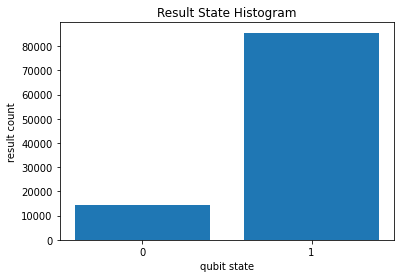

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())

> **<font color="red">We can reverse-engineer / extract the phase just from looking at the probability measures at end = Quantum Phase Estimation**

In [ ]:
result.histogram(key="a")

Counter({0: 14469, 1: 85531})

Result is around 0.14742. 

###### **<font color="blue">Step by Step Explanation**

https://jonathan-hui.medium.com/qc-phase-estimation-in-shors-algorithm-acef265ebe50

https://www.youtube.com/watch?v=5kcoaanYyZw

Reminder: QFT:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_084.png)

>**See below: Remember that a unitary matrix has eigenvalues of the form $e^{i \theta_{\psi}}$ (ohne $2 \pi$ wie oben bei QFT) and that it has eigenvectors that form an orthonormal basis**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_083.png)

The problem: in both cases the probability is 0,5, just differs by the phase added:

=((e^((i pi)/2))/sqrt(2))^2

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_078.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_079.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_080.png)

**The probability of measuring 0 and 1 is each 0,5, but there is a small factor that makes them differ from 0,5, depending on the phase (angle):**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_081.png)

Beachte: One complete turn (360°) is equal to 2π radians, so 180° is equal to π radians, or equivalently, the degree is a mathematical constant: **1° = π⁄180**.
https://en.wikipedia.org/wiki/Degree_(angle)

![ggg](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Degree_diagram.svg/440px-Degree_diagram.svg.png)

> **In the different between the probability of measuring 0 or 1, you've encoded that phase! (In other words: you've taken that phase information and turned it into and amplitude that you can measure.**

**How to do this experimentally: you do a million shots of the experiment, collect statistics and check what the statistics say. How many times did I get zero? How many times did I get one? The hope is that the difference between the statistics of zero and one would allow us to back out theta**.

**Next level: now getting more precision with more qubits:** (there is another circuit to prepare Psi yet, which is assumed to be given here)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_082.png)

writing out the calculation:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_085.png)

**Comparing QPE with QFT (QPE is the same as QFT with a different phase):**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_086.png)

It's like applying a QFT of something (of a special phase $\frac{\theta_{\psi}}{2^{n}} 2 \pi$, the green box above!), and in order to get back to the original state you need to apply an inverse QFT at the end:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_087.png)

###### **<font color="blue">Cirq Example**

https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html#creating_the_circuit

https://arxiv.org/pdf/1910.11696.pdf

![gg](https://upload.wikimedia.org/wikipedia/commons/a/a5/PhaseCircuit-crop.svg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_115.png)

$U$ = $Z^{2^{n-n}}$ 

Z = $e^{\pi}$ 

* $Z$ entspricht $\pi$ (ein halber Kreis, zB von +1 zu -1 auf X-Achse) 


then:

> <font color="blue">$U$ = $e^{\pi * 2^{n-n}}$


https://www.youtube.com/watch?v=YpcT8u2a2jc&list=PLOFEBzvs-VvrXTMy5Y2IqmSaUjfnhvBHR

In [ ]:
"""Set up the unitary and number of bits to use in phase estimation."""
# Value of θ which appears in the definition of the unitary U above.
# Try different values.
theta = 0.234

# Define the unitary U.
U = cirq.Z ** (2 * theta)

# Accuracy of the estimate for theta. Try different values.
n_bits = 3

Now we can build the first part of the circuit (up until the inverse QFT) for phase estimation.



In [ ]:
"""Build the first part of the circuit for phase estimation."""
# Get qubits for the phase estimation circuit.
qubits = cirq.LineQubit.range(n_bits)
u_bit = cirq.NamedQubit('u')

# Build the first part of the phase estimation circuit.
phase_estimator = cirq.Circuit(cirq.H.on_each(*qubits))

for i, bit in enumerate(qubits):
    phase_estimator.append(cirq.ControlledGate(U).on(bit, u_bit) ** (2 ** (n_bits - i - 1)))
    # explanation: U-rot control aktiviert wenn entsprechendes qubit in state 1
    # dann aktiviere formel: U^2^(n-1) ...U^2^(n-2) ...U^2^(n-n)

print(phase_estimator)

0: ───H───@──────────────────────────────
          │
1: ───H───┼──────────@───────────────────
          │          │
2: ───H───┼──────────┼─────────@─────────
          │          │         │
u: ───────Z^-0.128───Z^0.936───Z^0.468───


> <font color="blue">$U$ = $Z^{2^{n-n}}$ = $e^{\pi * 2^{n-n}}$ fur das erste Gate: = $e^{\pi * (-0.128)}$ ????


**The controlled u gate**:

$0\rangle \mapsto|00\rangle$

$|01\rangle \mapsto|01\rangle$

$|10\rangle \mapsto|1\rangle \otimes U|0\rangle=|1\rangle \otimes\left(u_{00}|0\rangle+u_{10}|1\rangle\right)$

$|11\rangle \mapsto|1\rangle \otimes U|1\rangle=|1\rangle \otimes\left(u_{01}|0\rangle+u_{11}|1\rangle\right)$

The matrix representing the controlled $U$ is

>$
\mathrm{C} U=\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}
\end{array}\right]
$

**When U is one of the Pauli operators, X,Y, Z, the respective terms "controlled-X", "controlled-Y", or "controlled-Z" are sometimes used**. 
Sometimes this is shortened to just CX, CY and CZ.

The next step is to perform the inverse QFT on the estimation qubits and measure them.



In [ ]:
def make_qft_inverse(qubits):
    """Generator for the inverse QFT on a list of qubits."""
    qreg = list(qubits)[::-1]
    while len(qreg) > 0:
        q_head = qreg.pop(0)
        yield cirq.H(q_head)
        for i, qubit in enumerate(qreg):
            yield (cirq.CZ ** (-1 / 2 ** (i + 1)))(qubit, q_head)

In [ ]:
"""Build the last part of the circuit (inverse QFT) for phase estimation."""
# Do the inverse QFT.
phase_estimator.append(make_qft_inverse(qubits[::-1]))

# Add measurements to the end of the circuit
phase_estimator.append(cirq.measure(*qubits, key='m'))
print(phase_estimator)

                                         ┌────────┐
0: ───H───@──────────H─────────@──────────@────────────────────────M('m')───
          │                    │          │                        │
1: ───H───┼──────────@─────────@^-0.5─────┼──────H────@────────────M────────
          │          │                    │           │            │
2: ───H───┼──────────┼─────────@──────────@^-0.25─────@^-0.5───H───M────────
          │          │         │
u: ───────Z^-0.128───Z^0.936───Z^0.468──────────────────────────────────────
                                         └────────┘


The initial state for u_bit is the  state, but the phase for this state is trivial with the operator we chose. Inserting a Pauli  operator at the begining of the circuit changes this to the  state, which has the nontrivial  phase.

In [ ]:
"""Set the input state of the eigenvalue register."""
# Add gate to change initial state to |1>.
phase_estimator.insert(0, cirq.X(u_bit))

print(phase_estimator)

                                         ┌────────┐
0: ───H───@──────────H─────────@──────────@────────────────────────M('m')───
          │                    │          │                        │
1: ───H───┼──────────@─────────@^-0.5─────┼──────H────@────────────M────────
          │          │                    │           │            │
2: ───H───┼──────────┼─────────@──────────@^-0.25─────@^-0.5───H───M────────
          │          │         │
u: ───X───Z^-0.128───Z^0.936───Z^0.468──────────────────────────────────────
                                         └────────┘


In [ ]:
"""Simulate the circuit and convert from measured bit values to estimated θ values."""
# Simulate the circuit.
sim = cirq.Simulator()
result = sim.run(phase_estimator, repetitions=10)

# Convert from output bitstrings to estimate θ values.
theta_estimates = np.sum(2 ** np.arange(n_bits) * result.measurements['m'], axis=1) / 2**n_bits
print(theta_estimates)

[0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.125]


**Here is a solution that just consists of what we did in previous cells all put together.**

In [ ]:
def phase_estimation(theta, n_bits, n_reps=10, prepare_eigenstate_gate=cirq.X):
    # Define qubit registers.
    qubits = cirq.LineQubit.range(n_bits)
    u_bit = cirq.NamedQubit('u')

    # Define the unitary U.
    U = cirq.Z ** (2 * theta)

    # Start with Hadamards on every qubit.
    phase_estimator = cirq.Circuit(cirq.H.on_each(*qubits))

    # Do the controlled powers of the unitary U.
    for i, bit in enumerate(qubits):
        phase_estimator.append(cirq.ControlledGate(U).on(bit, u_bit) ** (2 ** (n_bits - 1 - i)))

    # Do the inverse QFT.
    phase_estimator.append(make_qft_inverse(qubits[::-1]))

    # Add measurements.
    phase_estimator.append(cirq.measure(*qubits, key='m'))

    # Gate to choose initial state for the u_bit. Placing X here chooses the |1> state.
    phase_estimator.insert(0, prepare_eigenstate_gate.on(u_bit))

    # Code to simulate measurements
    sim = cirq.Simulator()
    result = sim.run(phase_estimator, repetitions=n_reps)

    # Convert measurements into estimates of theta
    theta_estimates = np.sum(2**np.arange(n_bits)*result.measurements['m'], axis=1)/2**n_bits

    return theta_estimates

In [ ]:
"""Analyze convergence vs n_bits."""
# Set the value of theta. Try different values.
theta = 0.123456

max_nvals = 16
nvals = np.arange(1, max_nvals, step=1)

# Get the estimates at each value of n.
estimates = []
for n in nvals:
    estimate = phase_estimation(theta=theta, n_bits=n, n_reps=1)[0]
    estimates.append(estimate)

In [ ]:
print(theta_estimates)

[0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.125]


In [ ]:
print(estimates)

[0.0, 0.0, 0.125, 0.125, 0.125, 0.125, 0.125, 0.16015625, 0.123046875, 0.123046875, 0.12353515625, 0.121337890625, 0.1234130859375, 0.12347412109375, 0.123443603515625]


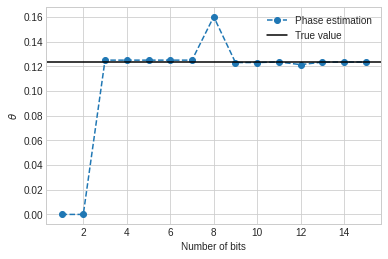

In [ ]:
"""Plot the results."""
plt.style.use("seaborn-whitegrid")

plt.plot(nvals, estimates, "--o", label="Phase estimation")
plt.axhline(theta, label="True value", color="black")

plt.legend()
plt.xlabel("Number of bits")
plt.ylabel(r"$\theta$");

#### <font color="blue">**Shor's Algorithm**

##### **<font color="black">Classical Calculation**

> <font color="blue">Factoring is equivalent to finding a nontrivial squareroot of 1 mod N.

> all we need to do is find this nontrivial squareroot of unity, and we can factor whatever number we need. As promised, we can do this with period finding, specifically by computing the order of a random integer

> The order of some integer x modulo N is the smallest integer r such that $x^r$ = 1 mod N

**<font color="black">Modular Arithmetic**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_088.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_089.jpg)

**<font color="blue">Step 1: Pick coprime of N**

In [ ]:
# Product of two prime numbers (to check later if result is correct)
N=5 * 3

# Pick coprime (!) number to N to factorize N into primes
a=13

**Code Example to understand periodicity in the context of factoring prime numbers:**

In [ ]:
import math
# Compute greated common divisor between a and N
math.gcd(a, N)

1

*Drei mögliche Verfahren zur Berechnung des ggT :*

Erstes Verfahren: Euklidischer Algorithmus 
* 15	:	13	  = 	1	  Rest  	2.	  Also ist ggT (15,13)= ggT (13,2)
* 13	:	2	  = 	6	  Rest  	1.	  Also ist ggT (13,2)= ggT (2,1)
* 2	:	1	  = 	2	  Rest  	0.	  Also ist ggT (2,1)= ggT (1,0)
* Ergebnis: Der ggT von 15 und 13 ist 1.

Zweites Verfahren: Vergleichen der Teilermengen .
* Die Teilermenge von 15 lautet: {1,3,5,15}.
* Die Teilermenge von 13 lautet: {1,13}.
* Die größte in beiden Teilermengen vorkommende Zahl ist 1. Also ist 1 der ggT von 15 und 13. 

Dritte Möglichkeit: Vergleichen der Primfaktorzerlegung
* Die Primfaktorzerlegung von 15 lautet: 15= 3·5.
* Die Primfaktorzerlegung von 13 lautet: 13= 13.
* Die gemeinsamen Primfaktoren sind: 1.
* Also ist 1 der ggT.

*Modulo (kurz: mod) berechnet den Rest einer Division zweier Zahlen. In Mathematischen Formeln wird modulo mit mod abgekürzt, beispielsweise: 23 mod 8 = 7. Bei dieser Rechnung kommt 7 heraus, weil die 8 zweimal in die 23 passt und dann 7 übrig bleiben.*

**<font color="blue">Step 2: Find the period of $a^r$ $\equiv$ 1 $(modN)$:**

* <font color="blue">the order of x is just the period of the function f(i) = $x^i$ mod N. 

* <font color="blue">In quantum computing you use QFT in order to determine the period !!

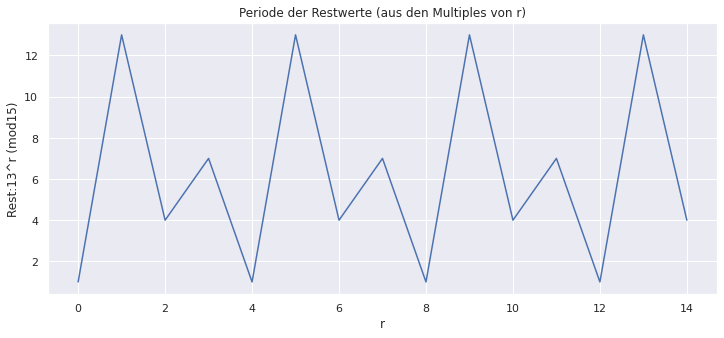

In [ ]:
import matplotlib. pyplot as plotter
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.5})

r = list(range(N))
y= [a**r0 % N for r0 in r]

plotter.plot (r, y)
plotter.xlabel('r')
plotter.ylabel('Rest:' f'{a}^r (mod{N})')
plotter.title('Periode der Restwerte (aus den Multiples von r)')
plotter.show()

<font color="red">**Beispiel: Choose any number $a$ and takes its multiple $r$ so many times, until the rest in modulo is 1, (except r=0)**</font>

> $13^0$ (mod 15) = 1 (mod 15) = 1

> $13^1$ (mod 15) = 13 

> $13^2$ (mod 15) = 169 (mod 15) = 4

* <font color="blue">*Erlauterung: Nimm 15 * 11 = 165, bis zur 169 verbleibt ein Rest 4*

> $13^3$ (mod 15) = 2197 (mod 15) = 7 

* <font color="blue">*Erlauterung: Nimm 15 * 146 = 2190, bis zur 2197 verbleibt ein Rest 7*

> $13^4$ (mod 15) = 28561 (mod 15) = 1 (<font color="blue"><u>hier started die Periode wieder, that's the r we are looking for!</u>)

> usw..

In [ ]:
r= r[y[1:].index(1)+1]
print(f'r = {r}')

r = 4


**<font color="blue">Step 3: Bestimme $x \equiv a^{\frac{r}{2}}(\operatorname{mod} N)$**. Mindestens einer der beiden Primfaktoren von N={p,q} is beinhalted in gcd(x+1, N) bzw. gcd(x-1, N)

*In this case with a=13, N=15 and r=4:*

* $x \equiv a^{\frac{r}{2}}(\operatorname{mod} N)$

* $x \equiv 13^{\frac{4}{2}}(\operatorname{mod} 15)$

* x = 169 (mod 15) = 4

  * gcd(x-1, N) = 3 = p

  * gcd(x+1, N) = 5 = q

In [ ]:
if r % 2 == 0:
  x = (a**(r/2.)) % N
  print(f'x = {x}')
  if ((x + 1) % N) != 0:
    print(math.gcd((int(x)+1), N), math.gcd((int(x)-1), N))
  else:
      print ("x + 1 is 0 (mod N)")
else:
  print (f'r = {r} is odd')

x = 4.0
5 3


Achtung: im nachsten Beispiel: N=11*7 (Primzahlen), a=18, ergibt x=43. 

* Davon x-1=42 und x+1=44. 
* Das sind naturlich keine Primzahlen, 
* Aber deren Faktoren sind: 44 = 2 * 2 * 11 und 42 = 2 * 3 * 7
* das heisst, x-1 und x+1 kann auch die Primzahlen indirekt enthalten!

**<font color="blue">Classical: Rechnung 2**

In [ ]:
# Product of two prime numbers (to check later if result is correct)
N=11 * 7 

# Pick coprime (!) number to N to factorize N into primes
a=18

In [ ]:
import math
# Compute greated common divisor between a and N
math.gcd(a, N)

1

*Drei mögliche Verfahren zur Berechnung des ggT :*

Erstes Verfahren: Euklidischer Algorithmus 

* 77	:	18	  = 	4	  Rest  	5.	  Also ist ggT (77,18)= ggT (18,5)
* 18	:	5	  = 	3	  Rest  	3.	  Also ist ggT (18,5)= ggT (5,3)
* 5	:	3	  = 	1	  Rest  	2.	  Also ist ggT (5,3)= ggT (3,2)
* 3	:	2	  = 	1	  Rest  	1.	  Also ist ggT (3,2)= ggT (2,1)
* 2	:	1	  = 	2	  Rest  	0.	  Also ist ggT (2,1)= ggT (1,0)
* Ergebnis: Der ggT von 77 und 18 ist 1.

Zweites Verfahren: Vergleichen der Teilermengen .

* Die Teilermenge von 77 lautet: {1,7,11,77}.
* Die Teilermenge von 18 lautet: {1,2,3,6,9,18}.
* Die größte in beiden Teilermengen vorkommende Zahl ist 1. 
* Also ist 1 der ggT von 77 und 18. 

Dritte Möglichkeit: Vergleichen der Primfaktorzerlegung

* Die Primfaktorzerlegung von 77 lautet: 77= 7·11.
* Die Primfaktorzerlegung von 18 lautet: 18= 2·3·3.
* Die gemeinsamen Primfaktoren sind: 1.
* Also ist 1 der ggT.

*Modulo (kurz: mod) berechnet den Rest einer Division zweier Zahlen. In Mathematischen Formeln wird modulo mit mod abgekürzt, beispielsweise: 23 mod 8 = 7. Bei dieser Rechnung kommt 7 heraus, weil die 8 zweimal in die 23 passt und dann 7 übrig bleiben.*

**<font color="blue">Find the period of $a^r$ $\equiv$ 1 $(modN)$:**

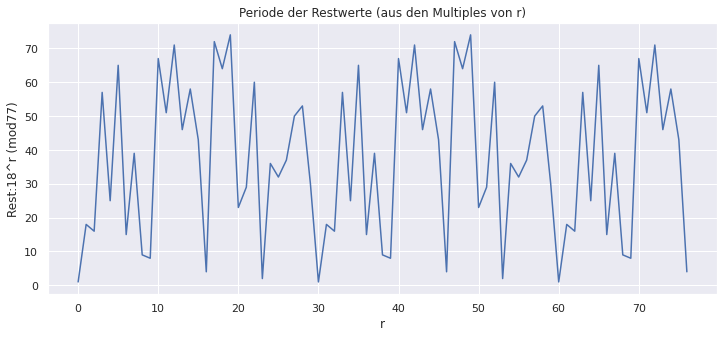

In [ ]:
import matplotlib. pyplot as plotter
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.5})

r = list(range(N))
y= [a**r0 % N for r0 in r]

plotter.plot (r, y)
plotter.xlabel('r')
plotter.ylabel('Rest:' f'{a}^r (mod{N})')
plotter.title('Periode der Restwerte (aus den Multiples von r)')
plotter.show()

*Beispiel: Choose any number $a$ and takes its multiple $r$ so many times, until the rest in modulo is 1, (except r=0)*

> $13^0$ (mod 15) = 1 (mod 15) = 1

> $13^1$ (mod 15) = 13 

> $13^2$ (mod 15) = 169 (mod 15) = 4

* <font color="blue">*Erlauterung: Nimm 15 * 11 = 165, bis zur 169 verbleibt ein Rest 4*

> $13^3$ (mod 15) = 2197 (mod 15) = 7 

* <font color="blue">*Erlauterung: Nimm 15 * 146 = 2190, bis zur 2197 verbleibt ein Rest 7*

> $13^4$ (mod 15) = 28561 (mod 15) = 1 (<font color="blue"><u>hier started die Periode wieder, that's the r we are looking for!</u>)

> usw..

In [ ]:
r= r[y[1:].index(1)+1]
print(f'r = {r}')

r = 30


In [ ]:
if r % 2 == 0:
  x = (a**(r/2.)) % N
  print(f'x = {x}')
  if ((x + 1) % N) != 0:
    print(math.gcd((int(x)+1), N), math.gcd((int(x)-1), N))
  else:
      print ("x + 1 is 0 (mod N)")
else:
  print (f'r = {r} is odd')

x = 43.0
11 7


**<font color="blue">Classical: Rechnung 3**

In [ ]:
# Product of two prime numbers (to check later if result is correct)
N=119 # 7 * 17

# Pick coprime (!) number to N to factorize N into primes
a=16

In [ ]:
import math
# Compute greated common divisor between a and N
math.gcd(a, N)

1

**<font color="blue">Find the period of $a^r$ $\equiv$ 1 $(modN)$:**

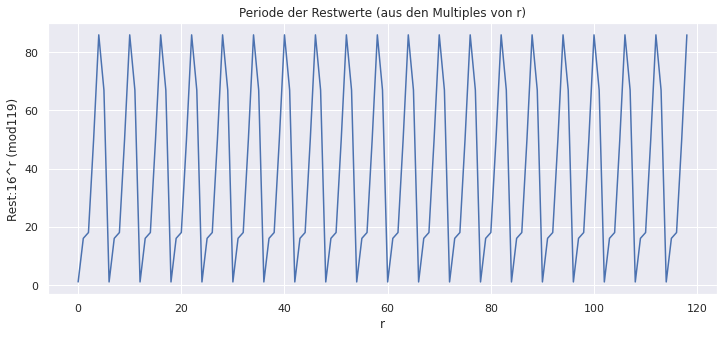

In [ ]:
import matplotlib. pyplot as plotter
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.5})

r = list(range(N))
y= [a**r0 % N for r0 in r]

plotter.plot (r, y)
plotter.xlabel('r')
plotter.ylabel('Rest:' f'{a}^r (mod{N})')
plotter.title('Periode der Restwerte (aus den Multiples von r)')
plotter.show()

In [ ]:
r= r[y[1:].index(1)+1]
print(f'r = {r}')

r = 6


The order of 16 mod 119 is 6. Now, we compute $16^3$ ≡ 50. 

Gcd(49,119) = 7, so 7 is a factor of 119, and gcd(51, 119) = 17 which is another factor of 119.

In [ ]:
if r % 2 == 0:
  x = (a**(r/2.)) % N
  print(f'x = {x}')
  if ((x + 1) % N) != 0:
    print(math.gcd((int(x)+1), N), math.gcd((int(x)-1), N))
  else:
      print ("x + 1 is 0 (mod N)")
else:
  print (f'r = {r} is odd')

x = 50.0
17 7


**<font color="blue">Classical: More Rechnungen**

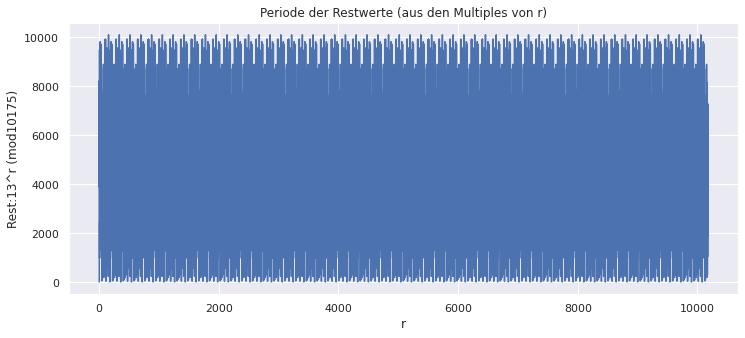

In [ ]:
# Product of two prime numbers (to check later if result is correct)
N=37 * 275

# Pick coprime (!) number to N to factorize N into primes
a=13

import matplotlib. pyplot as plotter
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.5})

r = list(range(N))
y= [a**r0 % N for r0 in r]

plotter.plot (r, y)
plotter.xlabel('r')
plotter.ylabel('Rest:' f'{a}^r (mod{N})')
plotter.title('Periode der Restwerte (aus den Multiples von r)')
plotter.show()

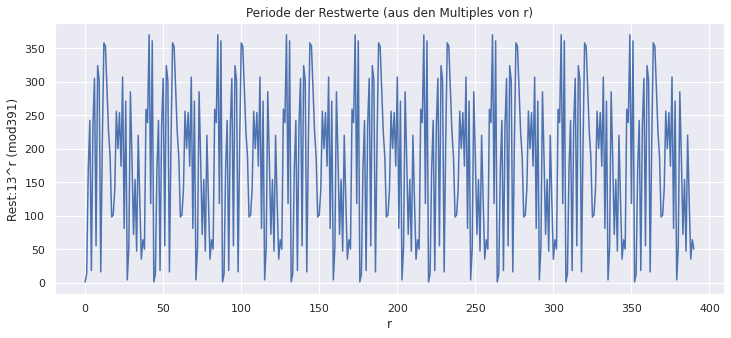

In [ ]:
# Product of two prime numbers (to check later if result is correct)
N=7 * 23

# Pick coprime (!) number to N to factorize N into primes
a=3

import matplotlib. pyplot as plotter
sns.set(rc={'figure.figsize':(12, 5), "lines.linewidth": 1.5})

r = list(range(N))
y= [a**r0 % N for r0 in r]

plotter.plot (r, y)
plotter.xlabel('r')
plotter.ylabel('Rest:' f'{a}^r (mod{N})')
plotter.title('Periode der Restwerte (aus den Multiples von r)')
plotter.show()

In [ ]:
r= r[y[1:].index(1)+1]
print(f'r = {r}')

r = 180


In [ ]:
if r % 2 == 0:
  x = (a**(r/2.)) % N
  print(f'x = {x}')
  if ((x + 1) % N) != 0:
    print(math.gcd((int(x)+1), N), math.gcd((int(x)-1), N))
  else:
      print ("x + 1 is 0 (mod N)")
else:
  print (f'r = {r} is odd')

x = 139.0
7 23


##### **Overview**

* When finding order using the period finding algorithm, it is important to use enough qubits. A sensible rule is that you need to use m qubits so that $2^m$ >> $N^2$, where N is the number we are trying to factor, because the order of a random number might be as large as N

* Example: Lets factor N=119. Suppose we pick the number 16 to start with. Wie viele Qubits m sollten wir mindestens nehmen? $N^2$ = $119^2$ =14.161 und $2^m$ muss deutlich grosser sein, also mindestens = $2^{14}$ = 16.384. Wir brauchen also mindestens 14 Qubits, um 119 zu faktorisieren.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_090.jpg)

* Because we know that the order of x will be even and $x^{s/2}$ will be a nontrivial square root with probability at least 1/2, we can be confident that we will be able to factor N in just a few runs of the algorithm. Because the time it takes to find the period grows as a polynomial in the number of bits, and the number of bits grows like 2logN(by the above requirement), we expect the time it takes to factor N to grow as a polynomial in logN.

* Here is the circuit for Shor’s Algorithm. It relies heavily on period finding, and so the circuit looks a lot like the circuit for period finding. The key difference is that we are finding the period of f(i) = xi, and the number of bits we need to input is very large.

**Example**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_091.jpg)

**How does it work in the quantum circuit?**

That's the function in $U$: given an $x$, the $U$ will compute:

> $f_{a, N}(x) \equiv a^{x}(\bmod N)$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_092.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_093.png)

**<font color="blue">Shor's Algorithm: Step by Step**

**Beispiel: a=13 und N=15, was macht Shor's Algorithm genau im Circuit an der Stelle $U_{f_{(a,N)}}$ und $QFT^{\dagger}$?**

ps: a muss ein Coprime von N sein. Wenn es kein Coprime ist, muessen wir nicht durch Shor's Algorithm gehen, weil a dann einen Faktor mit N teilt :) Aber es ist very unlikely to find a coprime of a large number N.

**First let's divide it into steps. 1-5:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_095.png)

##### <font color="blue">**Step 0 and 1: Get Qubits in state 0 and apply Hadamard Superposition**

**Step 0**: we start with 4 Qubits all in zeros, mit den Registers x und w, und jedes 4 Mal Tensorproduct multipliziert, weil wir 4 Qubits haben: 

> $|0\rangle_{x}^{\otimes 4}$ $|0\rangle_{w}^{\otimes 4}$

**Step 1**: All Hamadard Gates are applied to top 4 Qubits (x register), and right part (w register) gets nothing applied to it:

> $[H^{\otimes 4}|0\rangle] \,\, |0\rangle^{\otimes^{4}}$

> = $\frac{1}{4}[|0\rangle+|1\rangle+|2\rangle+\cdots+|15\rangle]$ $|0\rangle$

* Reminder 1: Multiplikation mit $\frac{1}{4}$, weil 4 Qubits in Hadamard-Superposition

* Reminder 2: this is the 4 bit representation of the decimal number, so for example 15 in binary = 1111. Daher kann man auch die 4 angeben als Erinnerung der Bit representation:

> = $\frac{1}{4}[|0\rangle_4+|1\rangle_4+|2\rangle_4+\cdots+|15\rangle_4]$ $|0\rangle_4$


##### <font color="blue">**Step 2: Compute $U$ with $f_{a, N}(x) \equiv a^{x}(\bmod N)$**

**Step 2**: Was passiert genau in der Box mit $U_{f_{(a,N)}}$?

**Given an $x$, the $U$ will compute: <font color="red">$f_{a, N}(x) \equiv a^{x}(\bmod N)$</font>**

Schauen wir nochmal im vorherigen Schritt und markieren eine Komponente:

> = $\frac{1}{4}[$ <font color="red">$|0\rangle_4$</font> $+|1\rangle_4+|2\rangle_4+\cdots+|15\rangle_4]$ $\,$ $|0\rangle_4$

<font color="red">$U_{f_{(a,N)}}$</font> macht dann folgendes:

> = $\frac{1}{4}$ <font color="red">[$|0\rangle_{4}\, \left|  0 \bigoplus 13^{0}(\bmod 15)\right\rangle_{4}$</font> + $|1\rangle_{4}\left|0 \bigoplus 13^{1}(\bmod 15)\right\rangle_{4}$ + $|2\rangle_{4}\left|0 \bigoplus 13^{2}(\bmod 15)\right\rangle_{4}$ + $|3\rangle_{4}\left|0 \bigoplus 13^{3}(\bmod 15)\right\rangle_{4}$ etc..]

Remember: $\bigoplus$ means "addition modular 2" bzw. "XOR". Anything XORs with 0, is thing itself: 0 $\bigoplus$ Z = Z. damit ergibt sich folgende Rechnung:

> = $\frac{1}{4}$ <font color="red">[$|0\rangle_{4}\, \left|   13^{0}(\bmod 15)\right\rangle_{4}$</font> + $|1\rangle_{4}\left| 13^{1}(\bmod 15)\right\rangle_{4}$ + $|2\rangle_{4}\left| 13^{2}(\bmod 15)\right\rangle_{4}$ + $|3\rangle_{4}\left| 13^{3}(\bmod 15)\right\rangle_{4}$ etc..]


Aus der Modulo-Rechnung ergeben sich die Restwerte:

* <font color="red">$13^{0}(\bmod 15)$ = 1</font>

* $13^{1}(\bmod 15)$ = 13

* $13^{2}(\bmod 15)$ = 4

* $13^{3}(\bmod 15)$ = 7

* $13^{4}(\bmod 15)$ = 1

* usw..

Since it's periodic, it will repeat, with the x and w register:

> = $\frac{1}{4}$ <font color="red">[$|0\rangle_{4}\,\left|1\right\rangle_{4}$</font> + $|1\rangle_{4}\left|13\right\rangle_{4}$ + $|2\rangle_{4}\left|4\right\rangle_{4}$ + $|3\rangle_{4}\left|7\right\rangle_{4}$ etc..]

Hier nochmal untereinander mit denselben Restwerten zur besseren Visualisierung:


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_094.png)

##### <font color="blue">**Step 3: Measurement of the w register / bottom 4 Qubits**

**Step 3**: Measurement of the w register / bottom 4 Qubits:

* the outputs of the w-register measurements are either 1, 13, 4 or 7 (die Restwerte) with equal probability

* let's say we measure 7, what happens to x? X becomes either 3, 7, 11 or 15 (the value in front of the qubit with 7!) with equal probability:

  * after $|\omega\rangle$ = $|7\rangle_4$ , $|x\rangle$ becomes:

  * <font color="blue">$|x\rangle$ $|\omega\rangle$ = $\frac{1}{2}\left[|3\rangle_{4}+|7\rangle_{4}+|11\rangle_{4}+ |15 \rangle_{4}\right]$ $\otimes |7\rangle_4$

  * Normalization has changed: before we had 16 combinations mit 1/4, here we have only 4 combinations with 1/2 (=one over square root of 4)

* **For the next step 4, the Restwert doesn't matter anymore, here: $\otimes |7\rangle_4$. We can ignore it. Because it step 4 we apply the measured $|x\rangle$ in the $QFT^{\dagger}$, and don't care about $|\omega\rangle$ anymore**. And $|x\rangle$ is in this case: $\frac{1}{2}\left[|3\rangle_{4}+|7\rangle_{4}+|11\rangle_{4}+ |15 \rangle_{4}\right]$


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_095.png)

##### <font color="blue">**Step 4: Apply inverse QFT**

**Step 4**: Apply $QFT^{\dagger}$ on the $|x\rangle$ register

* $QFT\,\,|x\rangle=|\tilde{x}\rangle=$ $\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{2 \pi i}{N} x y} |y\rangle$ (Reminder!)

* $QFT^{\dagger}|\tilde{x}\rangle=|x\rangle=$ $\frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i}{N} x y} |y\rangle$ (see -2 turning i in -i which is a complex conjugate operation)

* We want to know what QFT dagger is doing to (it is $\frac{1}{\sqrt{16}}$ because we have 4 Qubits)

  * $QFT^{\dagger}|3\rangle_4$ = $\frac{1}{\sqrt{16}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i 3 y}{16}}|y\rangle$

  * $QFT^{\dagger}|7\rangle_4$ = $\frac{1}{\sqrt{16}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i 7 y}{16}}|y\rangle$

  * $QFT^{\dagger}|11\rangle_4$ = $\frac{1}{\sqrt{16}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i 11 y}{16}}|y\rangle$

  * $QFT^{\dagger}|15\rangle_4$ = $\frac{1}{\sqrt{16}} \sum_{y=0}^{N-1} e^{\frac{-2 \pi i 15 y}{16}}|y\rangle$

Alltogether:

  * $QFT^{\dagger}|x\rangle$ = $\frac{1}{{8}} \sum_{y=0}^{15}$ [ $e^{-i\frac{ 3 \pi}{8}y}$ + $e^{-i\frac{ 7 \pi}{8}y}$ + $e^{-i\frac{ 11 \pi}{8}y}$ + $e^{-i\frac{ 15 \pi}{8}y}$] $|y\rangle$

    * with: $e^{-i\frac{ 3 \pi}{8}y}$ = $\cos \left(\frac{3 \pi}{8} y\right)-i \sin \left(\frac{3 \pi}{8} y\right)$ (und aquivalent fur alle anderen drei)

    * siehe coding rechnung unten was genau passiert hier!
  
  * <font color="blue">$QFT^{\dagger}|x\rangle$ = $\frac{1}{{8}}$ [ $4|0\rangle_4$ + $4i|4\rangle_4$ $-4|8\rangle_4$ $-4i|12\rangle_4$ ]</font>
  
  * Remember we had a sum before: $\frac{1}{{8}} \sum_{y=0}^{15}$. And notice how all the other terms now vanished to zero, because you had equal contributions of plus and minus.

    * **This is exactly what it means when people tell you that quantum computers take advantage of interference!! = when a lot of the terms vanish, and the answer only converges to the terms that we care about.**

    * here is the calculation what happened, you see many zeros:

<font color="red">Hier Beispielrechnung fur y=1, um vanishing components zu verstehen</font>. Unten im Code die Ergebnisse, zum Beispiel fur y=1 als Ergebnis = 0, $QFT^{\dagger}|x\rangle$ fur y = 1: 
    
  * $e^{-i\frac{ 3 \pi}{8}y}$ + $e^{-i\frac{ 7 \pi}{8}y}$ + $e^{-i\frac{ 11 \pi}{8}y}$ + $e^{-i\frac{ 15 \pi}{8}y}$ =
    
  * $e^{-i\frac{ 3 \pi}{8}1}$ + $e^{-i\frac{ 7 \pi}{8}1}$ + $e^{-i\frac{ 11 \pi}{8}1}$ + $e^{-i\frac{ 15 \pi}{8}1}$ =

    * $e^{-i\frac{ 3 \pi}{8}1}$ = <font color="green">0,382683432 - 0,923879533 i</font>

    * $e^{-i\frac{ 7 \pi}{8}1}$ = <font color="orange">-0,923879533 - 0,382683432 i</font>

    * $e^{-i\frac{ 11 \pi}{8}1}$ = <font color="green">-0,382683432 + 0,923879533 i</font>

    * $e^{-i\frac{ 15 \pi}{8}1}$ = <font color="orange">0,923879533 + 0,382683432 i</font>

  * Wie man sieht canceln sich die Terme aus (in gleicher Farbe), weshalb als Ergebnis fur y=1 Null entsteht.

In [ ]:
# Hier Beispiel fur y=1 und den ersten e-Term:
y = 1
pi = np.pi
coeff = np.exp(-1j*3*pi/8 * y)
if abs(coeff) < 1e-10: coeff= 0
print(y, coeff)

1 (0.38268343236508984-0.9238795325112867j)


In [ ]:
# Hier die komplette Rechnung fur alle y und alle 4 e-Terme:
import numpy as np

pi = np.pi
for y in range (15) :
  coeff = np.exp(-1j*3*pi/8 * y) + \
          np.exp(-1j*7*pi/8 * y) + \
          np.exp(-1j*11*pi/8* y) + \
          np.exp(-1j*15*pi/8* y)
  if abs(coeff) < 1e-10: coeff= 0
  print(y, coeff)

0 (4+0j)
1 0
2 0
3 0
4 (-5.757077917265737e-15+4j)
5 0
6 0
7 0
8 (-4-1.1514155834531474e-14j)
9 0
10 0
11 0
12 (2.2600304269997962e-14-4j)
13 0
14 0


##### <font color="blue">**Step 5: Measure the |x> register**

**Step 5**: Measure the |x> register: 

* You get either 0 or 4 or 8 or 12 with equal probability

* Remaining steps are classical post-processing

* You can already see the periodicity in the result: the difference is always 4

* Analyse what happens for each outcome: **The measurement results peak near $j\frac{N}{r}$ for same integer j $\in Z$. And r is the period that we are looking for. N = $2^n$ Qubits!**

  * if we measure |4>$_4$: $j\frac{16}{r}$ = 4, true if j=1 and r=4

  * there are multiple values that would work, but this is the lowest one

* now check our protocoll for r=4:

  * Is r even? yes!

  * $x \equiv a^{r / 2}(\bmod N)$ = $13^{4 / 2}(\bmod 15)$ = 4

  * x+1 = 5 and x-1 = 3

* This looks good, now check:

  * $\operatorname{gcd}(x+1, N)=\operatorname{gcd}(5,15)=5$

  * $\operatorname{gcd}(x-1, N)=\operatorname{gcd}(3,15)=3$

What do you do if r = 8 ?

* |8>$_4$: $j\frac{16}{r}$ = 8, true if j=1 and r=2 AND j=2 and r=4

* if r=4 we are back in the case before

* if r=2 then $x \equiv a^{r / 2}(\bmod N)$ = $13^{2 / 2}(\bmod 15)$ = 2, which brings x+1 = 3 and x-1 = 1

  * $\operatorname{gcd}(x+1, N)=\operatorname{gcd}(3,15)=3$

  * $\operatorname{gcd}(x-1, N)=\operatorname{gcd}(1,15)=1$

* This leads you to a partial solution. Now you can back out the other solution, with checking 3 divides into 15

* If we get r=0, then we need to do the experiment again

Hier die Faktorisierungsergebnisse fur verschiedene QC-Ausgaben r. Mit r=0 geht es nicht, also kann man in 3 von 4 Faellen faktorisieren (und mit r=8 bekommt man eine partial solution, kann aber immer noch faktorisieren).

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_097.png)

Aus dem 2001 Paper von IBM, Faktorisierung von 15 auf einem Quantum Computer:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_096.png)

##### <font color="blue">**Appendix: What is the Gate structure in $U$?**

* $a^{x_1}$, $a^{x_2}$, $a^{x_n}$ tells you this is a controlled operation

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_098.png)

* look now how the exponent doesn't contain $x_1$, $x_2$, .. $x_n$ anymore

* this is done by implementing it by doing these controls

* this is exactly like quantum phase estimation

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_099.png)

**Der linke Term stammt aus QPE, der rechte Term ist der Teil $U$ aus Shor's Algorithms:**

> <font color="blue">$U^{2^{x}}=a^{2^{x}}(\bmod N)$</font>

continue: https://youtu.be/IFmkzWF-S2k?t=1181

##### **<font color="black">Archive Details**

https://jonathan-hui.medium.com/qc-cracking-rsa-with-shors-algorithm-bc22cb7b7767

**Prerequisite**

* [Primfaktorzerlegung](https://de.m.wikipedia.org/wiki/Primfaktorzerlegung) und [Euklidischer Algorithmus](https://de.m.wikipedia.org/wiki/Euklidischer_Algorithmus)

* [Quantum Fourier Transform](https://en.m.wikipedia.org/wiki/Quantum_Fourier_transform) und [Fourier transform on finite groups](https://en.m.wikipedia.org/wiki/Fourier_transform_on_finite_groups)

* Read [Shor's Algorithm](https://en.m.wikipedia.org/wiki/Shor%27s_algorithm)

Video: [How Quantum Computers Break Encryption | Shor's Algorithm Explained](https://www.youtube.com/watch?v=lvTqbM5Dq4Q&t=584s)

Video: [How Shor's Algorithm Factors 314191](https://www.youtube.com/watch?v=FRZQ-efABeQ&t=98s)

**Step 1: To factorize a number N like 15 into its primes, let's take a random number g < N that might share a factor with the target number (but probably doesn't)**

That number g doesn't need to a pure factor. It can also be a number that shares some factors with N: 
	
> N = a * b and g = a * c

* like 4=2 * 2 and 6=2 * 3, with 2 being the shared factors.

* or in this case, starting with g = 10 

  * 10 < 15 (g < N)
  
  * 10 = 2 * 5 (you got here with Euclid's algorithm)

  * 15 = 3 * 5 (to show that there is a shared factor)

  * shared prime factor = 5

  * Now divide N = 15 by this shared factor 5 which gives you 3. The encryption is broken, you have both prime factors of 15.

* this is fine according to [Euclidean's algorithm](https://de.m.wikipedia.org/wiki/Euklidischer_Algorithmus) gcd(N,g)= ? ggT = groesster gemeinsamer teil (engl gcd)

* it says to find a factor of N we don't need a factor of N - guessing that share factors with N works too. N = f1 * f2, 5*f2?

* if Euclid's algorithm found any shared factor with N, we are done. You can divide N by that factor to get the other factor, and break encryption.

* with extremely large numbers it is very unlikely that a single guess share a factor with N. 



**Step 2: The algorithm transforms it into a much better guess that probably does share a factor with:**

> $g^{p/2}$ $\pm$ 1

Take a pair of whole numbers that don't share a factor and multiply one of them enough times, you will arrive at some whole number multiple of the other number plus 1:

> A, B -> A * A * A * A * A * A * .. = m * B + 1

Formalizing it:

> $A^p$ = m * B + 1

Example: guess g = 7 and target N = 15: 

* 7$^2$ $\neq$ 3*15 + 4

* 7$^3$ $\neq$ 22*15 + 13

* 7$^4$ = 160*15 + 1 = 2401 for both

So in our case for N and g:

> $g^p$ = m * N + 1

Re-arrange this: 

> $g^p$ -1 = m * N

And again:

> ($g^{p/2}$+1) * ($g^{p/2}$-1) = m * N

Is like a-factor * b-factor = m * N

These two terms a-factor and b-factor on the left side are the new and improved guesses that Shor's algorithm prescribes. They might be multiples of factors of N and not necessarily the factors themselves. For example:

* $7^{4/2}$ + 1 = 50 = a-factor, mit den Teilern: 1, 2, 5, 10, 25, 50. Primzahlen davon sind 2 und 5 (Faktorisierung:  2 * 5 * 5)

* $7^{4/2}$ - 1 = 48 = b-factor, mit den Teilern: 1, 2, 3, 4, 6, 8, 12, 16, 24, 48. Primzahlen davon sind 2 und 3 (Faktorisierung: 2 * 2 * 2 * 2 * 3=48)

Both 48 & 50 are not 15, but the first one has the factor 5 and the second the factor 3, which both lead to 15, thanks to Euclid's algorithm again here.

**Challenges with this approach**

1. One of the new guesses might itself be a multiple of N, like ($g^{p/2}$+1) = a * N. In this case the other would be a factor of m and neither would be useful to us.

2. The power of p might an odd number, in which case p/2 isn't a whole number and that lets to fractions: $42^{3/2}$ = 272,191... We are working with integers only.

  * For a random guess of g in at least 3/8ths of the time both problems don't happen (37,5%) and p does generate guesses that share factors with N with ($g^{p/2}$). 
  
  * And we are 99% likely yo break the encryption in fewer than 10 guesses.

3. But biggest problem: How do we find p?

Remember: to turn a bad guess into a good guess g -> ($g^{p/2}$+1)we need to know how many times p we have to multiply the guess g * g * g * g * g *... (p-times) before we get a multiple of N plus 1.

> $g^p$ = m * N + 1

and turned around (which is why the remainder has to be 1 !)

> ($g^{p/2}$+1) * ($g^{p/2}$-1) = m * N

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_02.png)


**Step 3: Here comes quantum mechanics in:** 

* normal computers would give one answer after another. A quantum computer can take the superposition and simultaneously "calculate" a bunch of possible answers for a single input. And you get only 1 answer out (randomly) with different probabilities for each one. 

* **Challenge: after you set up the superposition that calculates all answers at once you just need to cleverly arrange it so that all wrong answers destructively interfere with each other** (otherwise you just get a random answer from all possible states)

* that way when you measure the output of the calculation, the result of the measurement is most likely (not deterministically!) the right answer. 

* This is how it works in detail:

  * the quantum computer takes a number g as input 

  * then raises our guess to the power of x, which is $g^x$

  * we need to keep track of both the number x and our guess to that power: $g^x$

  * the computer then needs to take that result and calculate how much bigger than a multiple of N this is: (x, $g^x$) > m * N

* we call that the remainder and we'll write it as plus something for whatever something the remainder is: (x, +r) (but remember: we want the remainder of 1).

* in a quantum computer we can give a superposition of numbers and the computation will be done on all of them.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_01.png)

**Step 4: Quantum Fourier transform**

* we feed in a superposition of numbers |1> + |2> + |3> + ..into $g^x$ and computation will be done simultaneously on all of them, 

* first resulting in a superposition of all possible powers our guess could be raised to -> |1, $g^1$> + |2, $g^2$> + |3, $g^3$> + ..

* and then a superposition of how much bigger each of those powers are than a multiple of N -> |1, +17> + |2, +5> + |3, +92>

* but we can't just measure the superposition. We would get a single random element of the superposition, like for |2, +5>: "our guess squared is 5 more than a multiple of N", which is like randomly guessing powers.

* We need something clever to get all the non-p answers to destructively interfere and cancel each other out, leaving us with only 1 possible answer: |p, +1>

We can do this based on anther mathematical observation: If $g^x$ is r more than a multiple of N, then $g^{x+p}$ will also be r more than a multiple of N (though a different multiple):

* like before:

  * 7$^4$ = 160*15 + 1 = 2401 with g=7 and p=4  being the multiple of m=160 *  N=15, just with another p and hence another m, but r= +1 staying the same

  * Now 7$^{2*4}$ = 5.764.801 is the same = 384.320 * 15 +1 ( with m being new = 384.320)

  * as you see: m is different now, **but the remainder +1 stays the same**, when in $g^p$ p is another power of the original p  - twice original p=4

  * Achtung: not sure if that calculation above is correct because in the image below there is an addition of $g^{x+p}$ and not $g^{x*p}$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_03.png)

So the power p that we are looking for, the one that allows us to improve our bad guess p: g -> $g^{p/2}$ $\pm$ 1. **p has a repeating power**, where if we take another power and add p to it, the amount more than a multiple of N stays the same:

$g^{x}$ or $g^{x+p}$ or $g^{x-p}$ or $g^{x+2p}$ have all the same: +r

* this repeating property isn't something you could figure out from taking our guess to just oe power - it's a structural relationship between different powers, and we can take advantage of it since quantum computations can be performed on superpositions of different possible powers: 

$g^{2}$ or $g^{12}$ or $g^{22}$ lead all to +7

$g^{3}$ or $g^{13}$ or $g^{23}$ lead all to +4

|2> + |3> + |12> + |13> + |22> + |23> 

Specifically if we take the superposition of all possible powers and just measure the "amount more than a multiple of N" part, then we'll randomly get one of the possible "amounts more than a multiple of N" as the output, say 3 as +r.

We must be left with a superposition of purely the powers that could have resulted in a remainder of 3. This is a special property of quantum computation: if you put in a superposition and get an answer that could have come from more than one element of the superposition, then you'll be left with the superposition of just those elements, like

|2, +3> + |12,+3> + |22,+3> + ..

And in our case, because of the repeating property, those powers are all numbers that are p apart from each other.



![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_04.png)

We are trying to find p, because it will allow us to turn a bad guess into a good guess for a number that shares factors withy N. 

And we now have a quantum superposition of numbers that repeat periodically with a period of p, or equivalently, they repeat with a frequency of 1/p. If you can find the frequency, we can find p.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_05.png)

The best tool to find the frequency of things is the Fourier transform. Input an audio signal as a wave of time, and get the different frequencies the wave is made up of. 

There is a quantum version of the Fourier transform, which we can apply to our superposition that repeats with a frequency of 1/p to cause all the different possible wrong frequencies to destructively interfere, leaving us with a single quantum state: the frequency |1/p>, which we can finally measure to get the actual output of the computation.

How does QFT work? Input a single number and it gives you a superposition of all other numbers, that are weighted by different amounts. And those weights look roughly like a sine wave with the frequency of the single number we put in. If we out in a higher number, we get a higher frequency. 

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_06.png)

And if you put in a superposition of numbers, you get out a superposition of superpositions and the sine waves add together - or subtract and cancel each other out. 


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_07.png)

And it happens if you put in a superposition of numbers that are all separated by an amount p, all those sine waves interfere so that what you get out (oversimplified) is the single quantum state representing 1/p (all the rest destructively interfered).

This result we invert to find p 1/(1/p) -> p

And as long as p is even we can now finally raise our guess to the power of p over 2 and add or subtract one, and as long we don't get an exact multiple of N, we are guaranteed to have a number that shares a factor with N. Then we can use Euclid's algorithm to quickly find those factors. 

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_08.png)

Summary:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/shor_09.png)

https://medium.com/@brcsomnath/qml-quantum-oracle-c8a48cdaf851

#### <font color="blue">**Grover Search**

###### **<font color="blue">Grover Search: Overview**

Grover’s algorithm solves oracles that **add a negative phase to the solution states**. I.e. for any state |x⟩ in the computational basis:

> $U_{\omega}|x\rangle=\left\{\begin{aligned}|x\rangle & \text { if } x \neq \omega \\-|x\rangle & \text { if } x=\omega \end{aligned}\right.$

We create a function $f$ that takes a proposed solution $x$, and returns 

* $f(x)=0$ if $x$ is not a solution ( $x \neq \omega)$ 

* $f(x)=1$ for a valid solution $(x=\omega)$.

The oracle can then be described as:

> $U_{\omega}|x\rangle=(-1)^{f(x)}|x\rangle$

* you can see this is an Eigenvalue equation



The oracle's matrix will be a diagonal matrix of the form:

> $U_{\omega}=\left[\begin{array}{cccc}(-1)^{f(0)} & 0 & \cdots & 0 \\ 0 & (-1)^{f(1)} & \cdots & 0 \\ \vdots & 0 & \ddots & \vdots \\ 0 & 0 & \cdots & (-1)^{f\left(2^{n}-1\right)}\end{array}\right]$

*Source: https://qiskit.org/textbook/ch-algorithms/grover.html*

> Grover's Algorithm uses a phase shift to increase the amplitude of the favorable state and to decrease the amplitudes of all other states (=Phase Flip of Desired Outcome + Probability Amplitudes Inversion about the Mean to Amplify)

https://youtu.be/951pds5_5YM

https://towardsdatascience.com/where-the-quantum-advantage-comes-from-5accd926eb7a

https://towardsdatascience.com/towards-understanding-grovers-search-algorithm-2cdc4e885660

* you can use binary search for sorted data

* but for unsorted, unstructured data, we need to use the 'linear search' alghorithm: browse through each single item

* Grover’s algorithm teaches us how we can search for an item in an unsorted list without needing to look at each item one by one but by looking at them all at once. It accomplishes that using two techniques. 
  
  * First, it uses a quantum oracle to mark the searched state. 
  
  * Second, it uses a diffuser that amplifies the amplitude of the marked state to increase its measurement probability.

* The measurement probability of a state depends on the amplitude of this particular state. Mathematically, the measurement probability is the squared absolute of the amplitude. 

* If we use four qubits, for example, then there are 2^4=16 different states. Starting from |0000⟩, to |0001⟩, ending at |1111⟩.

* Each qubit can have a specific meaning. We could interpret it as a letter. A letter that does not have 26 different options but only two, |0⟩ and |1⟩. **With a sufficient number of qubits, we could represent all living humans. With 33 qubits, we can represent around 8.5 billion different states**. A phonebook of mankind. And we haven’t sorted it.


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_101.jpg)

###### **<font color="blue">Step 1: Hadamard-Operator for Superposition + Assign a Phase -1 to the desired outcome**

Start with a balanced superposition, and assign a phase of -1 to the chosen ket, 111). Assigning -1 means applying a Pauli-Z-operator in the superposition to this one !!

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_102.jpg)

* Now, let’s say four qubits are enough and Mr. Grover is known as |0010⟩. The oracle uses the specific characteristic of this state to identifying it. That is the state has a |1⟩ at the third position and |0⟩ otherwise.

* Since the quantum oracle takes all qubits as input, it can easily apply a transformation of this exact state. It doesn’t matter whether we use four qubits or 33. The oracle identifies Mr. Grover in a single turn.

* The transformation the oracle applies to the searched state is an inversion of the amplitude.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_109.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_110.png)

* In the representation above representation (the dark one) of the amplitudes, we can clearly see a difference between the searched state and all the other states. We could prematurely declare the search is over.

* The only difference is in the sign of the amplitude. For the measurement probability results from the amplitude’ absolute square, the sign does not matter at all.

* The amplitude originates from the concept that every quantum entity may be described not only as a particle but also as a wave. The main characteristic of a wave is that it goes up and down as it moves. The amplitude is the distance between the center and the crest of the wave.

* If we invert the amplitude of a wave at all positions, the result is the same wave shifted by half of its wavelength.

* These two waves differ only in their relative position. This is the phase of the wave. For the outside world, the phase of a wave is not observable. Observed individually, the two waves appear identical. So, the problem is we can’t tell the difference between these two waves.

> As a consequence, the system does not appear any different from the outside. Even though the oracle marked the searched state and it, therefore, differs from the other states, all states still have the same measurement probability.


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_111.png)

See here what that means:

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

In [ ]:
ops=[cirq.H(a),
     cirq.H(b),
     cirq.Z(a), # adding a phase shift on qubit a, shifts from + to - (https://javafxpert.github.io/grok-bloch/)
     # no second hadamard added!, so we measure directly from the superposition state
     cirq.measure(a,b)]

circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───Z───M───
              │
b: ───H───────M───


In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100000)
print('Measurement results')
print(result)

Measurement results
a,b=0111000111011011010100111000010011110101011010100010110001100101100100001101111100110111000111011101000001100111111000010111000111010011001100001010111011010101110011011000100010011101001111011100101101011011011111101101100010011000110110101110011000110111100000011110001010000111100100011110001000100011110010111001110111000001010100010101111110000000010100110000000011000100111000000111010000000100101101100100011001100011000011110010101110101101100111110100011111110111000101111100000100011011010110101001001110011011001110111010110011001110111010110001011111111110011010011001000010000111100101001111111101000011000001101110100110100111111000011010100111001100001001000110100111110101110111100100001101011011111101001101111100110001100111000011101101100100010101101111111001111101101101100011100010101000110100100101110001101011111001100010001100000101110000101001010100100011000101000011111011101010001110111011100000010001011000010010110110001010001010000111110110000101

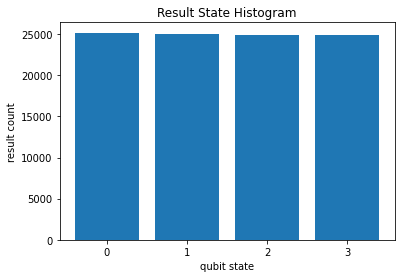

In [ ]:
_ = cirq.vis.plot_state_histogram(result, plt.subplot())

*As predicted, even though we shifted qubit a by a phase, the overall probabilities to measure a and b are still the same if we dont apply an amplifier (=a second H gate at the end)*

In [ ]:
result.histogram(key="a,b")

Counter({0: 25134, 1: 24844, 2: 25157, 3: 24865})

###### **<font color="blue">Step 2: Invert all probability amplitudes about the mean + Measure**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_103.jpg)

* We need to turn the difference into something measurable. We need to increase the measurement probability of the marked state. This is the task of the diffuser. The diffuser applies an inversion about the mean amplitude.

* Let’s have a look at the average amplitude.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_112.png)

* With four qubits, we have 16 different states. Each state has an amplitude of 1/sqrt(16)=1/4. In fact, each but one state — the searched state has this amplitude. The searched state has an amplitude of −1/4. Thus, the average is (15∗1/4−1/4)/16=0.21875.

* The average is a little less than the amplitude of all states we did not mark. If we invert these amplitudes by this mean, they end up a little lower than the average at 0.1875.

* For the amplitude of the marked state is negative, it is quite far away from the average. The inversion about the mean has a greater effect. It flips the amplitude from −0.25 by 2∗(0.25+0.21875) to 0.6875 (bzw: =0,21875-(-0,25-0,21875)).

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_113.png)

* The inversion about the mean works well if we search for a single or a few negative amplitudes among many positive amplitudes. Then, this operation increases the negative amplitudes we know are the correct ones. And this operation decreases the positive amplitudes, we know are wrong.

> This operation increases the negative amplitude by a large amount while decreasing the positive amplitudes by a small amount.

* But the more states we have, the lower the overall effect will be. In our example, we calculated the new amplitude of the searched state as 0.6875. The corresponding measurement probability is 0.6875^2=0.47265625. Accordingly, we measure this system only about every other time in the state we are looking for. Otherwise, we measure it in any other case.

* Of course, we could now measure the system many times and see our searched state as the most probable one. But running the algorithm so many times would give away any advantage we gained from not searching all the states.

> **Instead, we repeat the algorithm. We use the same oracle to negate the amplitude of the searched state. Then we invert all the amplitudes around the mean, again**.

However, we must not repeat this process too many times. There is an optimal number of times of repeating this process to get the greatest chance of measuring the correct answer. 

* The probability of obtaining the correct result grows until we reach about π/4*sqrt(N) with N is the number of states of the quantum system. Beyond this number, the probability of measuring the correct result decreases again.

* In our example with four qubits and N=16 states, the optimum number of iterations is 3.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_104.jpg)

d is our matrix for the controlled Z operation (to highlight (11) as our desired result)

**<font color="blue">More about Amplitude Amplification**

* [Amplitude amplification](https://en.m.wikipedia.org/wiki/Amplitude_amplification) is a technique in quantum computing which **generalizes the idea behind the Grover's search algorithm**, and gives rise to a family of quantum algorithms.

* In a quantum computer, amplitude amplification can be used to **obtain a quadratic speedup over several classical algorithms**.

1. If there are $G$ good entries in the database in total, then we can find them by initializing a quantum register $|\psi\rangle$ with $n$ qubits where $2^{n}=N$ into a uniform superposition of all the database elements $N$ such that

>$| \psi \rangle=\frac{1}{\sqrt{N}} \sum_{k=0}^{N-1}|k\rangle
$

2. and running the above algorithm. In this case the overlap of the initial state with the good subspace is equal to the square root of the frequency of the good entries in the database, $\sin (\theta)=|P| \psi\rangle \mid=\sqrt{G / N}$. If $\sin (\theta) \ll 1$, 

3. we can
approximate the number of required iterations as

>$
n=\left\lfloor\frac{\pi}{4 \theta}\right\rfloor \approx\left\lfloor\frac{\pi}{4 \sin (\theta)}\right\rfloor=\left\lfloor\frac{\pi}{4} \sqrt{\frac{N}{G}}\right\rfloor=O(\sqrt{N})
$

Measuring the state will now give one of the good entries with high probability.

Since each application of $S_{P}$ requires a single oracle query (assuming that the oracle is implemented as a quantum gate), we can find a good entry with just $O(\sqrt{N})$ oracle queries, thus obtaining a quadratic speedup over the best possible classical algorithm. (The classical method for searching the database would be to perform the query for every $e \in\{0,1, \ldots, N-1\}$ until a solution is found, thus costing $O(N)$ queries.) Moreover, we can find all $G$ solutions using $O(\sqrt{G N})$ queries.

###### **<font color="blue">Grover Search: Simple Examples (Z-Gate and I-Gate as amplifiers)**

https://towardsdatascience.com/towards-understanding-grovers-search-algorithm-2cdc4e885660

**Example 1: Z Gate to switch from 0 to 1**

* Let’s say the state |1⟩ depicts the favorable state we want to find. Then, the oracle consists of the Z-gate that switches the amplitude when the corresponding qubit is in state |1⟩.

* As a result, we see the amplitude changed for state |1⟩. The qubit is now in state |−⟩. Its two states |0⟩ and |1⟩ are in two different phases, now.

* In other words, we flipped the amplitude of state |1⟩ from positive to negative.

* Both states still have a measurement probability of 0.5. It is the task of the diffuser to magnify the amplitude to favor the searched state.

* **The diffuser in a single-qubit circuit is quite simple. It is another H-gate**. This circuit results in state |1⟩ with absolute certainty.



In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")

#Line-Qubit
qubits = cirq.LineQubit.range(1)

In [ ]:
ops=[cirq.H(a),
     cirq.Z(a), # adding a phase shift on qubit a, shifts from + to - (https://javafxpert.github.io/grok-bloch/)
     cirq.H(a), # without the second H, there is still 50/50 probability, after H it changed to 1 with 100% probability
     cirq.measure(a)]

circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───Z───M───


In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

Measurement results
a=0111101010100101010001110110110000001111100011010101110000001110001100000100011000011000111100111011


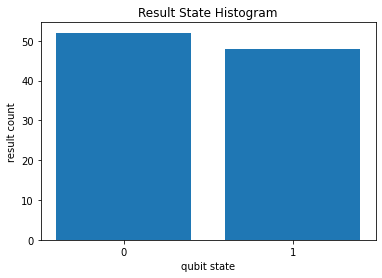

In [ ]:
_ = cirq.vis.plot_state_histogram(result, plt.subplot())

In [ ]:
result.histogram(key="a")

Counter({1: 100})

We applied an important sequence on the qubit, the HZH-circuit. This circuit is known as an identity to the NOT-gate (X-gate) that turns state |0⟩ into |1⟩ and vice versa.

The following equation proves this identity.

> $H Z H=\frac{1}{\sqrt{2}}\left[\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right]\left[\begin{array}{cc}1 & 0 \\ 0 & -1\end{array}\right] \frac{1}{\sqrt{2}}\left[\begin{array}{cc}1 & 1 \\ 1 & -1\end{array}\right]=\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right]=X$

Then, why would we use the HZH-sequence? If it is similar to the NOT-gate, why don’t we use that instead?

Simply put, the HZH-sequence is more flexible. It is the simplest form of Grover’s search algorithm. It starts with all states being equal (the first H-gate). It applies an oracle (Z-gate). And, it uses a diffuser that amplifies the amplitude of the selected state |1⟩ (the second H-gate).

> While we could rewrite these two circuits more succinctly, the circuit identities of HZH=X and HIH=I let us use the general structure of Grover’s algorithm. Simply by changing the oracle, we can mark and amplify different states. We don’t need to come up with a new algorithm for each possible state we want to select out of a list. But we only need to find an appropriate oracle. This ability comes in handy the more states our quantum system has.

> The search for one of two possible states does not even deserve to be called a search. But the general structure of Grover’s algorithm is not different from this very simple example. **It uses a phase shift to increase the amplitude of the favorable state and to decrease the amplitudes of all other states**.

**Example 2: I Gate to stay in 0**

To prove this flexibility, let’s say we wanted to select state |0⟩ instead. This is the task of the oracle. The starting state and the diffuser remain untouched. The oracle for state |0⟩ is the I-gate. Or, simply doing nothing.


In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")

#Line-Qubit
qubits = cirq.LineQubit.range(1)

In [ ]:
ops=[cirq.H(a),
     cirq.I(a), # adding a identity gate
     cirq.H(a),
     cirq.measure(a)]

circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───I───H───M───


In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

Measurement results
a=0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


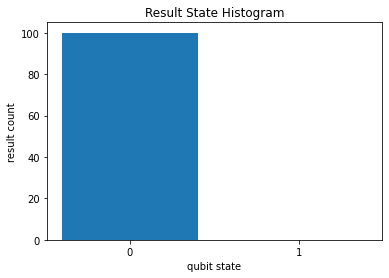

In [ ]:
_ = cirq.vis.plot_state_histogram(result, plt.subplot())

In [ ]:
result.histogram(key="a")

Counter({0: 100})

###### **<font color="blue">Grover Search: Cirq**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_105.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_106.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_107.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_108.jpg)

https://towardsdatascience.com/where-the-quantum-advantage-comes-from-5accd926eb7a

https://towardsdatascience.com/towards-understanding-grovers-search-algorithm-2cdc4e885660

https://jonathan-hui.medium.com/qc-grovers-algorithm-cd81e61cf248

> **[Grover’s algorithm](https://en.m.wikipedia.org/wiki/Grover's_algorithm) teaches us how we can search for an item in an unsorted list without needing to look at each item one by one but by looking at them all at once.**

It accomplishes that using two techniques:

  * First, it uses a quantum oracle to mark the searched state. 
  
  * Second, it uses a diffuser that amplifies the amplitude of the marked state to increase its measurement probability.

Grover's Algorithm : Suche in grossen Datenbanken (Squared speedup: get result in the square root of time that on classical computers)

* Auf einem klassischen Computer ist der prinzipiell schnellstmögliche Suchalgorithmus in einer unsortierten Datenbank die [lineare Suche](https://de.m.wikipedia.org/wiki/Lineare_Suche), die ${\mathcal {O}}\left(N\right)$ Rechenschritte erfordert (Der Suchaufwand wächst linear mit der Anzahl der Elemente in der Liste.)

* Die effizientere [Binäre Suche](https://de.m.wikipedia.org/wiki/Binäre_Suche) kann nur bei geordneten Listen benutzt werden. Die Binäre Suche ist deutlich schneller als die lineare Suche, welche allerdings den Vorteil hat, auch in unsortierten Feldern zu funktionieren. In Spezialfällen kann die [Interpolationssuche](https://de.m.wikipedia.org/wiki/Interpolationssuche) schneller sein als die binäre Suche.

* Makes use of Amplitude Amplification, Quantum Walk & Quantum Counting

https://towardsdatascience.com/where-the-quantum-advantage-comes-from-5accd926eb7a

https://towardsdatascience.com/a-practical-guide-to-quantum-amplitude-amplification-dbcbe467044a

https://jonathan-hui.medium.com/qc-grovers-algorithm-cd81e61cf248

**So let’s build the 2 qubit grover search algorithm for 00** [Source](https://medium.com/@adubey40/grovers-algo-with-google-s-cirq-c7b359ce0d13)

In [ ]:
import cirq

q0, q1 = cirq.LineQubit.range(2)
# q0 = cirq.GridQubit(0, 0)
# q1 = cirq.GridQubit(0, 1)

grover = cirq.Circuit()
grover.append([cirq.H(q0), cirq.H(q1)])

# Oracle for |00⟩ :
grover.append([cirq.X(q0), cirq.X(q1)])
grover.append(cirq.CX(q0,q1))
grover.append([cirq.X(q0), cirq.X(q1)])

grover.append([cirq.H(q0), cirq.H(q1)])

# reflection circuit :
grover.append([cirq.Z(q0), cirq.Z(q1)])
grover.append(cirq.CX(q0,q1))

grover.append([cirq.H(q0), cirq.H(q1)])
grover.append([cirq.measure(q0), cirq.measure(q1)])

print(grover)

simulator = cirq.Simulator()
result = simulator.simulate(grover)
# result = simulator.run(circuit, repetitions=40) # NISQ computers
print(result)

0: ───H───X───@───X───H───Z───@───H───M───
              │               │
1: ───H───X───X───X───H───Z───X───H───M───
measurements: 0=0 1=0
output vector: |00⟩


**Cirq**

In [ ]:
"""Get qubits to use in the circuit for Grover's algorithm."""
# Number of qubits n.
nqubits = 2

# Get qubit registers.
qubits = cirq.LineQubit.range(nqubits)
ancilla = cirq.NamedQubit("Ancilla")

In [ ]:
def make_oracle(qubits, ancilla, xprime):
    """Implements the function {f(x) = 1 if x == x', f(x) = 0 if x != x'}."""
    # For x' = (1, 1), the oracle is just a Toffoli gate.
    # For a general x', we negate the zero bits and implement a Toffoli.

    # Negate zero bits, if necessary.
    yield (cirq.X(q) for (q, bit) in zip(qubits, xprime) if not bit)

    # Do the Toffoli.
    yield (cirq.TOFFOLI(qubits[0], qubits[1], ancilla))

    # Negate zero bits, if necessary.
    yield (cirq.X(q) for (q, bit) in zip(qubits, xprime) if not bit)

In [ ]:
def grover_iteration(qubits, ancilla, oracle):
    """Performs one round of the Grover iteration."""
    circuit = cirq.Circuit()

    # Create an equal superposition over input qubits.
    circuit.append(cirq.H.on_each(*qubits))

    # Put the output qubit in the |-⟩ state.
    circuit.append([cirq.X(ancilla), cirq.H(ancilla)])

    # Query the oracle.
    circuit.append(oracle)

    # Construct Grover operator.
    circuit.append(cirq.H.on_each(*qubits))
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on(qubits[1]))
    circuit.append(cirq.CNOT(qubits[0], qubits[1]))
    circuit.append(cirq.H.on(qubits[1]))
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))

    # Measure the input register.
    circuit.append(cirq.measure(*qubits, key="result"))

    return circuit

In [ ]:
"""Select a 'marked' bitstring x' at random."""
xprime = [random.randint(0, 1) for _ in range(nqubits)]
print(f"Marked bitstring: {xprime}")

NameError: ignored

In [ ]:
"""Create the circuit for Grover's algorithm."""
# Make oracle (black box)
oracle = make_oracle(qubits, ancilla, xprime)

# Embed the oracle into a quantum circuit implementing Grover's algorithm.
circuit = grover_iteration(qubits, ancilla, oracle)
print("Circuit for Grover's algorithm:")
print(circuit)

In [ ]:
"""Simulate the circuit for Grover's algorithm and check the output."""
# Helper function.
def bitstring(bits):
    return "".join(str(int(b)) for b in bits)

# Sample from the circuit a couple times.
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=10)

# Look at the sampled bitstrings.
frequencies = result.histogram(key="result", fold_func=bitstring)
print('Sampled results:\n{}'.format(frequencies))

# Check if we actually found the secret value.
most_common_bitstring = frequencies.most_common(1)[0][0]
print("\nMost common bitstring: {}".format(most_common_bitstring))
print("Found a match? {}".format(most_common_bitstring == bitstring(xprime)))

#### **<font color="blue">Quantum Counting**

> **In quantum counting, we simply use the quantum phase estimation algorithm to find an eigenvalue of a Grover search iteration.**

* how many solutions exist?

* does there any solution exist?

The percentage number of solutions in our search space affects the difference between $|s\rangle$ and $\left|s^{\prime}\right\rangle$. For example, if there are not many solutions, $|s\rangle$ will be very close to $\left|s^{\prime}\right\rangle$ and $\theta$ will be very small. It turns out that the eigenvalues of the Grover iterator are $e^{\pm i \theta}$, and **we can extract this using quantum phase estimation (QPE) to estimate the number of solutions $(M)$**.


**First we want to get $\theta$ from measured_int. (phase estimation)** 

* You will remember that $\mathrm{QPE}$ gives us a measured value $=2^{n} \phi$ from the eigenvalue $e^{2 \pi i \phi}$, 

* so to get $\theta$ we need to do:

> $
\theta=\text { value } \times \frac{2 \pi}{2^{t}}
$

**Second, we calculate the inner product of $|s\rangle$ and $\left|s^{\prime}\right\rangle:$**

> $
\left\langle s^{\prime} \mid s\right\rangle=\cos \frac{\theta}{2}
$

* And that $|s\rangle$ (a uniform superposition of computational basis states) can be written in terms of $|\omega\rangle$ and $\left|s^{\prime}\right\rangle$ as:

> $
|s\rangle=\sqrt{\frac{M}{N}}|\omega\rangle+\sqrt{\frac{N-M}{N}}\left|s^{\prime}\right\rangle
$

* The inner product of $|s\rangle$ and $\left|s^{\prime}\right\rangle$ is:

> $
\left\langle s^{\prime} \mid s\right\rangle=\sqrt{\frac{N-M}{N}}=\cos \frac{\theta}{2}$

* From this, we can use some trigonometry and algebra to show:

> $
N \sin ^{2} \frac{\theta}{2}=M
$

**Third, calculate number of solutions**

* From the Grover's algorithm chapter, you will remember that a common way to create a diffusion operator, $U_{s}$, is actually to implement $-U_{s}$. 

* This implementation is used in the Grover iteration provided in this chapter. In a normal Grover search, this phase is global and can be ignored, but now we are controlling our Grover iterations, this phase does have an effect. 

* The result is that we have effectively searched for the states that are not solutions, and our quantum counting algorithm will tell us how mâny states are not solutions. To fix this, we simply calculate 

> $N-M$

https://qiskit.org/textbook/ch-algorithms/quantum-counting.html

* [Quantum counting algorithm](https://en.m.wikipedia.org/wiki/Quantum_counting_algorithm) is a quantum algorithm for efficiently counting the number of solutions for a given search problem. The algorithm is based on the quantum phase estimation algorithm and on Grover's search algorithm.

* Counting problems are common in diverse fields such as statistical estimation, statistical physics, networking, etc. As for quantum computing, the ability to perform quantum counting efficiently is needed in order to use Grover's search algorithm (because running Grover's search algorithm requires knowing how many solutions exist). Moreover, this algorithm solves the quantum existence problem (namely, deciding whether any solution exists) as a special case.

* The algorithm was devised by Gilles Brassard, Peter Høyer and Alain Tapp in 1998.

#### **<font color="red">Quantum Walk**

https://towardsdatascience.com/creating-a-quantum-walk-with-a-quantum-coin-692dcfa30d90

http://quantum-technologies.iap.uni-bonn.de/de/quantum-walks.html

https://quantumai.google/cirq/tutorials/quantum_walks

https://medium.com/qiskit/studying-quantum-walks-on-near-term-quantum-computers-f60fd2395f04

* [Quantum walks](https://en.m.wikipedia.org/wiki/Quantum_walk) are quantum analogues of classical random walks. In contrast to the classical random walk, where the walker occupies definite states and the randomness arises due to stochastic transitions between states, in quantum walks randomness arises through: 

  (1) quantum superposition of states, 
  
  (2) non-random, reversible unitary evolution and 
  
  (3) collapse of the wave function due to state measurements.



As with classical random walks, quantum walks admit formulations in both discrete time and continuous time.

* Quantum walks are motivated by the widespread use of classical random walks in the design of randomized algorithms, and are part of several quantum algorithms. For some oracular problems, quantum walks provide an exponential speedup over any classical algorithm.

* Quantum walks also give polynomial speedups over classical algorithms for many practical problems, such as the element distinctness problem, the triangle finding problem, and evaluating NAND trees. The well-known Grover search algorithm can also be viewed as a quantum walk algorithm

* Quantum walks exhibit very different features from classical random walks. In particular, they do not converge to [limiting distributions](https://en.m.wikipedia.org/wiki/Asymptotic_distribution) and due to the power of quantum interference they may spread significantly faster or slower than their classical equivalents.

*Continuous-time quantum walks*

* [Continuous-time quantum walks](https://en.m.wikipedia.org/wiki/Continuous-time_quantum_walk) arise when one replaces the continuum spatial domain in the Schrödinger equation with a discrete set.

* Under particular conditions, continuous-time quantum walks can provide a model for universal quantum computation.

###### **<font color="blue">Exkurs: Qumodes, Qudits and Qutrits</font>**

**<font color="blue">Qumodes</font>**

(CV systems / continuous spectra in infinite-dimensional Hilbert space)

https://strawberryfields.ai/photonics/concepts/photonics.html

**<font color="blue">Qudits and Qutrits</font>**

https://en.m.wikipedia.org/wiki/Qutrit

https://en.m.wikipedia.org/wiki/Qubit#Qudits_and_qutrits

#### <font color="red">**Harrow-Hassidim-Lloyd Algorithm (HHL)**

https://www.quantamagazine.org/new-quantum-algorithms-finally-crack-nonlinear-equations-20210105/

###### **<font color="blue">Overview of HHL</font>**

The [quantum algorithm for linear systems of equations](https://en.m.wikipedia.org/wiki/Quantum_algorithm_for_linear_systems_of_equations) designed by Aram Harrow, Avinatan Hassidim, and Seth Lloyd.

> is a quantum algorithm for solving linear systems. 

> The algorithm estimates the result of a scalar measurement on the solution vector to a given linear system of equations.

* The algorithm is one of the main fundamental algorithms expected to provide a speedup over their classical counterparts, along with Shor's factoring algorithm, Grover's search algorithm, the quantum fourier transform and quantum simulation. 

* Provided the linear system is sparse and has a low condition number $\kappa_{1}$ and that the user is interested in the result of a scalar measurement on the solution vector, instead of the values of the solution vector itself, then the algorithm has a runtime of $O\left(\log (N) \kappa^{2}\right)$, where $N$ is the number of variables in the linear system. This offers an exponential speedup over the fastest classical algorithm, which runs in $O(N \kappa)$ (or $O(N \sqrt{\kappa})$ for positive semidefinite matrices).

**Promise**: 

* Solving 10,000 linear equation: a classical computer needs in best case 10,000 steps. HHL just 13.

* Unlike the classical solutions to the Deutsch-Jozsa and search problems, most of our classical methods for matrix manipulation do work in polynomial time. However, as data analysis becomes more and more powerful (and more and more demanding on today’s computers), the size of these matrices can make even polynomial time too long.

**Disadvantages:**

* solution vector is not yielded (rather it prepares a quantum state that is proportional to the solution): Actually reading out the solution vector would take O(N)time, so we can only maintain the logarithmic runtime by sampling the solution vector like ⟨x|M|x⟩, where M is a quantum-mechanical operator. Therefore, **HHL is useful mainly in applications where only samples from the solution vector are needed**. 

* Entries of matrix have to be sparse: Additionally, although HHL is exponentially faster than Conjugate Gradient in N, it is polynomially slower in s and 𝜅, so HHL is restricted to only those matrices that are sparse and have low condition numbers.

* Must satisfy robust invertibility (means that entries of matrix must all approx. of same size)

* Preparation of input vector is complicated


https://en.wikipedia.org/wiki/Quantum_algorithm_for_linear_systems_of_equations

https://en.wikipedia.org/wiki/Quantum_optimization_algorithms

https://www.quantamagazine.org/a-new-approach-to-multiplication-opens-the-door-to-better-quantum-computers-20190424/

https://www.quantamagazine.org/teenager-finds-classical-alternative-to-quantum-recommendation-algorithm-20180731/

https://medium.com/mit-6-s089-intro-to-quantum-computing/hhl-solving-linear-systems-of-equations-with-quantum-computing-efb07eb32f74

https://qiskit.org/textbook/ch-applications/hhl_tutorial.html

https://en.m.wikipedia.org/wiki/Quantum_algorithm_for_linear_systems_of_equations

###### <font color="blue">**Applications of HHL & Familiar methods**

* Systems of linear equations arise naturally in many real-life applications in a wide range of areas, such as in the solution of Partial Differential Equations, the calibration of financial models, fluid simulation or numerical field calculation. 

* Makes use of Quantum Phase Estimation

* Quantum Matrix Inversion

* **Used in many quantum machine learning algorithms as a building block**


**Applications of HHL**

* The quantum algorithm for linear systems of equations has been applied to a support vector machine, which is an optimized linear or non-linear binary classifier (https://arxiv.org/abs/1307.0471v2)

* for Least-squares fitting (https://arxiv.org/abs/1204.5242)

* for finite-element-methods (https://arxiv.org/abs/1512.05903) (but only for higher problems which include solutions with higher-order derivatives and large spatial dimensions. For example, problems in many-body dynamics require the solution of equations containing derivatives on orders scaling with the number of bodies, and some problems in computational finance, such as Black-Scholes models, require large spatial dimensions)

**Familiar methods of solutions**

* Substitution method
* Graphical method
* Matrix method
* Cramer's rule
* Gaussian elimination

###### <font color="blue">**Approach and Subroutines**

https://en.m.wikipedia.org/wiki/System_of_linear_equations#Matrix_solution

[Peter Witteg: Quantum Machine Learning - 37 - Overview of the HHL Algorithm](https://m.youtube.com/watch?v=hQpdPM-6wtU)

[Google Quantum: Quantum Algorithms for Systems of Linear Equations (Quantum Summer Symposium 2020)](https://m.youtube.com/watch?v=Xvp56xeNZo4)

> **Given a matrix $A \in \mathbb{C}^{N \times N}$ and a vector $\vec{b} \in \mathbb{C}^{N}$, find $\vec{x} \in \mathbb{C}^{N}$ satisfying $A \vec{x}=\vec{b}$**

> The spectrum of $A$ is given by: $A\left|v_{j}\right\rangle=\lambda_{j}\left|v_{j}\right\rangle, 1 \geq\left|\lambda_{j}\right| \geq 1 / \kappa$

> *One crucial remark to keep in mind is that the classical algorithm returns the full solution, while the HHL can only approximate functions of the solution vector.*

**Main Subroutines in HHL:**

* Hamiltonian simulation
* Phase estimation (newer: linear combination of unitaries)
* (Variable-time) amplitude amplification

**HHL-Approach**

1. Prepare the initial state $|b\rangle$. Note that $|b\rangle=\sum_{j} c_{j}\left|v_{j}\right\rangle$.

2. Use the so-called phase estimation algorithm to perform the map
$|b\rangle \rightarrow \sum_{j} c_{j}\left|v_{j}\right\rangle\left|\tilde{\lambda}_{j}\right\rangle$

* $|\tilde{\lambda}_{j}\rangle$ -> This register contains the eigenvalue estimates.

3. Apply a one-qubit conditional rotation to perform the map
$|0\rangle \rightarrow \frac{1}{\kappa \tilde{\lambda}_{j}}|0\rangle+\sqrt{1-\frac{1}{\kappa^{2} \tilde{\lambda}_{j}^{2}}}|1\rangle$

4. Undo step 2 - apply the inverse of phase estimation
$\sum_{j} \frac{c_{j}}{\kappa \tilde{\lambda}_{j}}\left|v_{j}\right\rangle|0\rangle+|\mathrm{bad}\rangle|1\rangle \approx \frac{1}{\kappa A}|b\rangle|0\rangle+|\mathrm{bad}\rangle|1\rangle$

5. Use amplitude amplification to get rid of the „bad“ part of the state with |1>


### <font color="blue">**Pending Algorithms**

#### <font color="black">**Hidden Subgroup Problem (HSP)**

Shor’s approach to integer factorisation is based on reducing the task to a special case of a mathematical problem known as the hidden subgroup problem (HSP), then giving an efficient quantum algorithm for this problem.

https://arxiv.org/pdf/1511.04206.pdf

#### <font color="black">**More Quantum Linear Algebra & Optimization**

###### **<font color="blue">Quantum Power Iteration & Inverse Iteration**

* used for Eigenvalue calculation in large matrices

* [Power iteration (Eigenvalues)](https://en.m.wikipedia.org/wiki/Power_iteration) und [Inverse Iteration (Eigenvector)](https://en.m.wikipedia.org/wiki/Inverse_iteration)

* [Quantum Power Method by a Superposition of Time-Evolved States](https://arxiv.org/abs/2008.03661)

###### **<font color="blue">Quantum Multiplication</font>**

* **Boost Multiplication of Karatsuba with Quantum Computers**: In his new paper, Gidney describes a quantum way of implementing Karatsuba multiplication that doesn’t impose huge memory costs. Instead of generating intermediate values to produce a final value, he uses a method called “tail call optimization” to directly mutate inputs to outputs. 

* This allows the algorithm to avoid creating intermediate information that a quantum computer can never discard. “He gets rid of the issue of having to deal with extra qubits by not having extra qubits,” said Thomas Wong, a quantum information scientist at Creighton University.Gidney expects that his method will work for adapting many classical recursive algorithms to quantum computers. 

[A New Approach to Multiplication Opens the Door to Better Quantum Computers](https://www.quantamagazine.org/a-new-approach-to-multiplication-opens-the-door-to-better-quantum-computers-20190424/)

###### **<font color="blue">Quantum Principal Component Analysis</blue>**

S. Lloyd, M. Mohseni, and P. Rebentrost, Nature Physics 10,
631 (2014)

https://arxiv.org/abs/1307.0401

###### **<font color="blue">Quantum Linear Regression</blue>**

https://www.quantamagazine.org/new-algorithm-breaks-speed-limit-for-solving-linear-equations-20210308/

https://www.quantamagazine.org/teenager-finds-classical-alternative-to-quantum-recommendation-algorithm-20180731/

https://www.quantamagazine.org/mathematicians-inch-closer-to-matrix-multiplication-goal-20210323/

https://www.quantamagazine.org/a-new-approach-to-multiplication-opens-the-door-to-better-quantum-computers-20190424/

M. Schuld, I. Sinayskiy, and F. Petruccione, arXiv preprint
arXiv:1601.07823 (2016). https://arxiv.org/abs/1601.07823

#### **<font color="black">Quantum Simulation**

... (Monte Carlo, Quantum Chemistry, Materials Science and more)


###### **<font color="blue">Quantum Simulators**

https://en.wikipedia.org/wiki/Quantum_chemistry

https://en.m.wikipedia.org/wiki/Quantum_simulator

https://de.wikipedia.org/wiki/Quantensimulation

quantum chemistry: https://www.youtube.com/watch?v=2XEjrwWhr88

How is Quantum Phase Estimation applied to Quantum Chemistry calculations: in Quantum Chemistry you are interested in dynamics = time evolution. QPE is helping us to ...so Hamiltonian dynamics is unitary, and so you can use that unitary that comes from your Hamiltonian to do simulations in chemistry.

* Many important problems in physics, especially [low-temperature physics](https://en.m.wikipedia.org/wiki/Thermodynamics) and [many-body physics](https://en.m.wikipedia.org/wiki/Many-body_theory), remain poorly understood because the underlying quantum mechanics is vastly complex. See also [Condensed_matter_physics](https://en.m.wikipedia.org/wiki/Condensed_matter_physics) (incl. crystallography etc)

* Conventional computers, including supercomputers, are inadequate for simulating quantum systems with as few as 30 particles. Better computational tools are needed to understand and **rationally design materials whose properties are believed to depend on the collective quantum behavior of hundreds of particles**.

* Quantum simulators provide an alternative route to understanding the properties of these systems. These simulators create clean realizations of specific systems of interest, which allows precise realizations of their properties. Precise control over and broad tunability of parameters of the system allows the influence of various parameters to be cleanly disentangled.

* Quantum simulators can solve problems which are difficult to simulate on classical computers **because they directly exploit quantum properties of real particles**. In particular, they exploit a property of quantum mechanics called superposition, wherein a quantum particle is made to be in two distinct states at the same time, for example, aligned and anti-aligned with an external magnetic field. Crucially, simulators also take advantage of a second quantum property called entanglement, allowing the behavior of even physically well separated particles to be correlated.



###### **<font color="blue">Stochastic Processes and Monte Carlo Simulations**

https://en.m.wikipedia.org/wiki/Quantum_Monte_Carlo

https://en.wikipedia.org/wiki/Quantum_Markov_chain

https://www.nature.com/articles/s41534-021-00459-2

Quantum Gaussian Process Algorithm (QGPA): https://arxiv.org/pdf/1803.10520.pdf

###### **<font color="blue">Hybrid: Variational quantum eigensolver (i.e. Protein Folding)**

The VQE algorithm applies classical optimization to minimize the energy expectation of an ansatz state to find the ground state energy of a molecule. This can also be extended to find excited energies of molecules.

*Optimization: simulations for material science and quantum chemistry, factoring numbers*

* Known as variational quantum algorithms, they use the quantum boxes to manipulate quantum systems while shifting much of the work load to classical computers to let them do what they currently do best: solve optimization problems.

* "With variational quantum algorithms, we get the best of both worlds. We can harness the power of quantum computers for tasks that classical computers can't do easily, then use classical computers to compliment the computational power of quantum devices."

* The algorithms are called variational because the optimization process varies the algorithm on the fly, as a kind of machine learning. It changes parameters and logic gates to minimize a cost function, which is a mathematical expression that measures how well the algorithm has performed the task. The problem is solved when the cost function reaches its lowest possible value. 

* In an iterative function in the variational quantum algorithm, the quantum computer estimates the cost function, then passes that result back to the classical computer. The classical computer then adjusts the input parameters and sends them to the quantum computer, which runs the optimization again. 



https://phys-org.cdn.ampproject.org/c/s/phys.org/news/2021-08-algorithms-small-noisy-quantum-viable.amp

https://www.nature.com/articles/s42254-021-00348-9

*Resource-efficient quantum algorithm for protein folding*

* Rather than spend computational resources checking each possible fold of a protein, the quantum approach encodes the superposition of all physically meaningful ways of folding the protein into a model Hamiltonian. Then it samples these combinations statistically to find the series of folds that are the most stable.

* “Everything in our body wants to be in the minimum free-energy configuration,” said Barkoutsos. “It is the most stable. And we generally say in nature — in our bodies — the most stable is the winning configuration.”
With this approach, the researchers simulated the folding of a 10-amino acid chain called Angiotensin with a 22 qubit quantum simulator, and a seven-amino acid neuropeptide on a 20-qubit quantum computer.
Multipurpose, open-source code

* This work relied on a modified Variational Quantum Eigensolver (VQE) algorithm, a major optimization tool in the quantum arsenal, drawn from the Qiskit Application Module.

* To suit their needs, the team modified the VQE to sample only the parts of the data relevant to the problem, producing a tool they called a Conditional Value-at-Risk (CVaR) VQE. In line with IBM Quantum’s open-source ethos, this tool is now available to the Qiskit community as of the latest Qiskit Nature release.

https://medium.com/qiskit/a-novel-quantum-algorithm-for-protein-folding-paving-the-way-toward-resolving-one-of-the-biggest-861112139ff0

https://www.nature.com/articles/s41534-021-00368-4

#### **<font color="black">Computing Knot Invariants**

https://en.m.wikipedia.org/wiki/Jones_polynomial

Witten had shown that the Chern-Simons topological quantum field theory (TQFT) can be solved in terms of Jones polynomials. A quantum computer can simulate a TQFT, and thereby approximate the Jones polynomial, which as far as we know, is hard to compute classically in the worst-case scenario.